In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:/Users/91965/Downloads/1645779348_project_dataset_feature_engineering20220225t085351z001/Project_Dataset_Feature_Engineering/PEP1.csv")
data .head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## a. To identify the shape of the dataset:

In [3]:
print("Shape of the dfset:",data.shape) 

Shape of the dfset: (1460, 81)


## b. To identify variables with null values:

In [4]:
null_counts = data.isnull().sum()
print("Variables with null values:\n", null_counts[null_counts > 0])

Variables with null values:
 LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


## c. To identify variables with unique values:

In [5]:
unique_counts = data.nunique()
print("Variables with unique values:\n", unique_counts[unique_counts == 1])

Variables with unique values:
 Series([], dtype: int64)


## 2. Generate a separate dataset for numerical and categorical variables:

In [6]:
numerical_data = data.select_dtypes(include=['int64', 'float64'])
categorical_data = data.select_dtypes(include=['object'])

In [7]:
numerical_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


## 3. EDA of numerical variables:
### a. Missing value treatment:

In [8]:
(numerical_data.isna().sum()/(len(numerical_data)))*100

Id                0.000000
MSSubClass        0.000000
LotFrontage      17.739726
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
MasVnrArea        0.547945
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchebvGr        0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       5.547945
GarageCars        0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
S

In [9]:
numerical_data.fillna(numerical_data.median(), inplace=True)

In [10]:
numerical_data.isna().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchebvGr       0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

### b. Identifying the skewness and distribution

In [11]:
skewness = numerical_data.apply(lambda x: x.skew())
print("Skewness of numerical variables:\n", skewness)

Skewness of numerical variables:
 Id                0.000000
MSSubClass        1.407657
LotFrontage       2.409147
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchebvGr        4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.678333
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.2

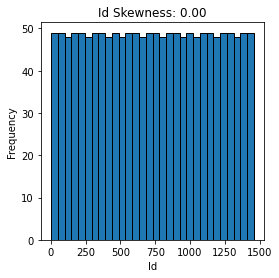

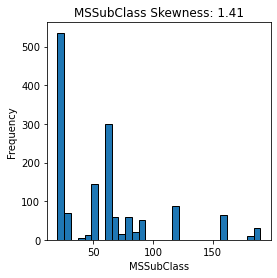

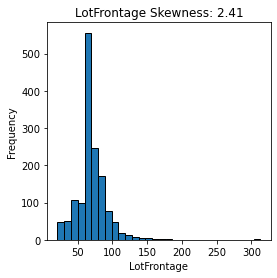

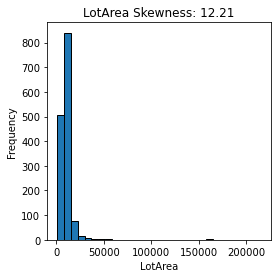

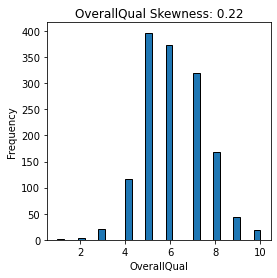

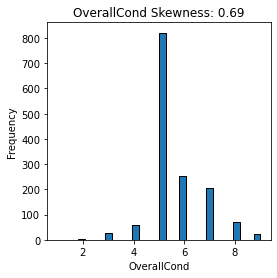

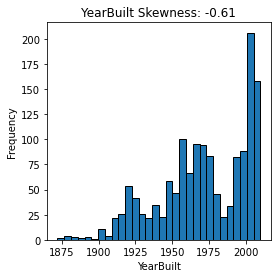

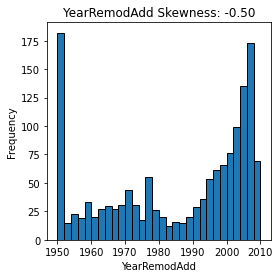

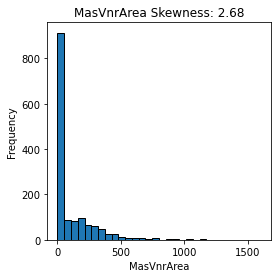

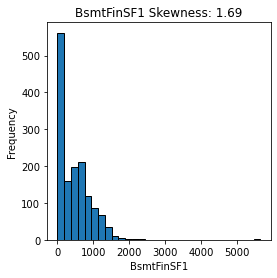

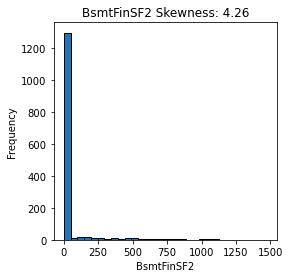

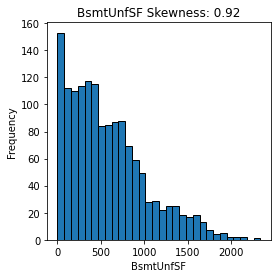

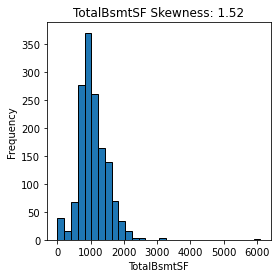

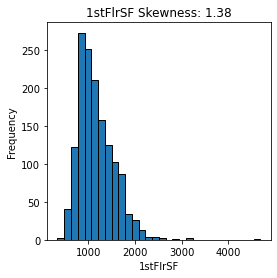

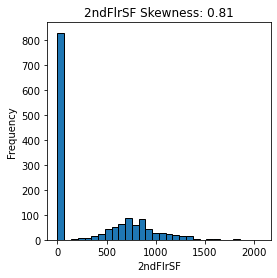

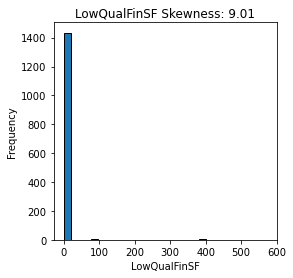

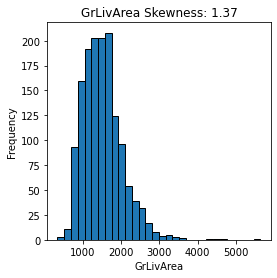

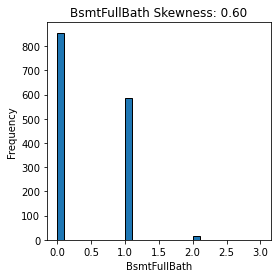

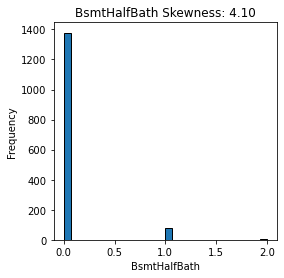

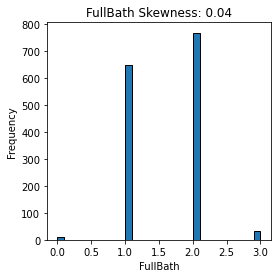

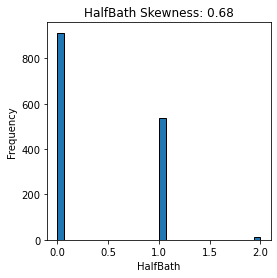

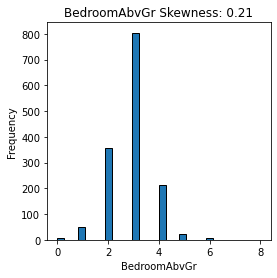

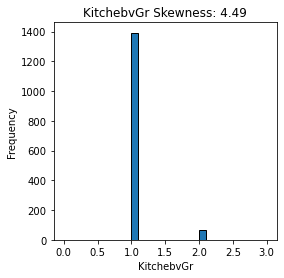

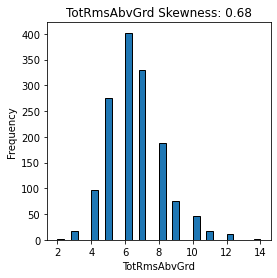

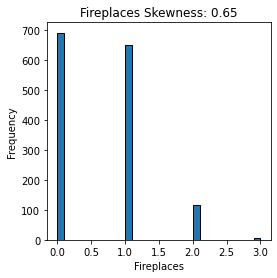

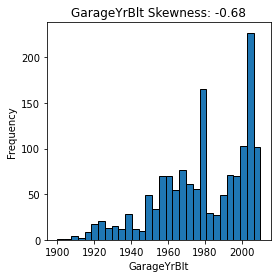

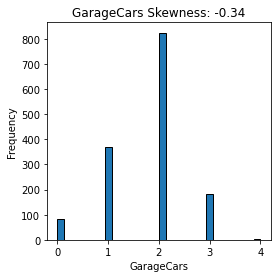

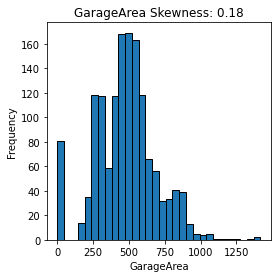

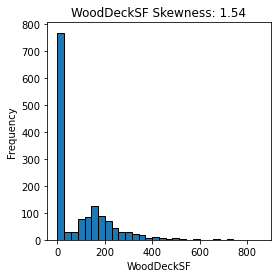

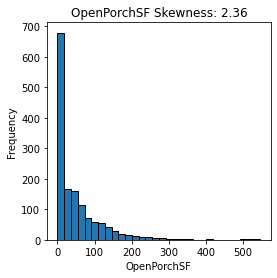

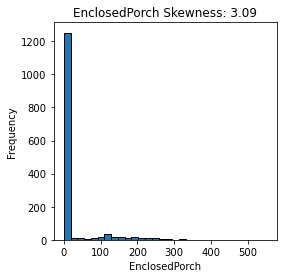

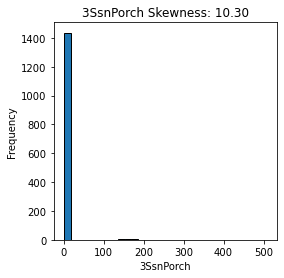

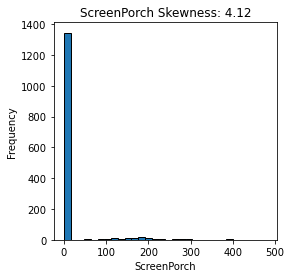

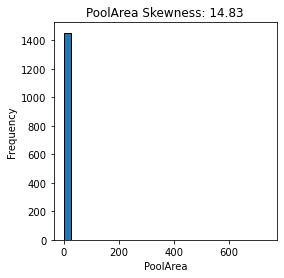

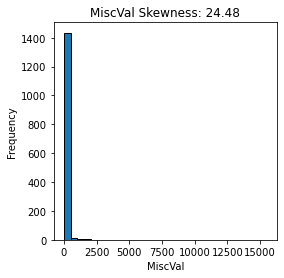

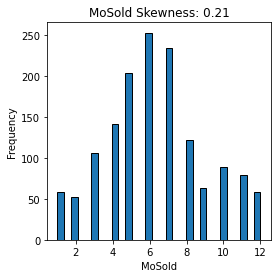

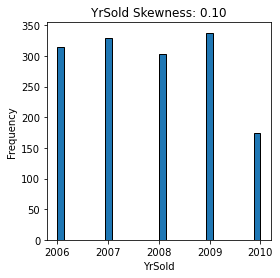

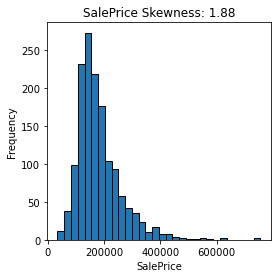

In [12]:
numerical_columns = data.select_dtypes(include=['int64','float64']).columns
for column in numerical_columns:
    skewness = numerical_data[column].skew()
    plt.figure(figsize=(4, 4))
    plt.hist(numerical_data[column], bins=30, edgecolor='k')
    plt.title(f'{column} Skewness: {skewness:.2f}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## c. Identify significant variables using a correlation matrix:

In [13]:
correlation_matrix = numerical_data.corr()
# Use visualization (e.g., heatmap) to identify highly correlated variables

correlation_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


## d. Pair plot for distribution and density:

<AxesSubplot:>

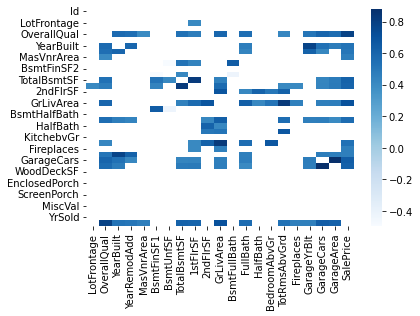

In [14]:
correlation_threshold = 0.4
significant_mask = (correlation_matrix.abs() >= correlation_threshold) & (correlation_matrix != 1.0)
significant_correlations = correlation_matrix[significant_mask].dropna(how='all',axis=1)
sns.heatmap(data= significant_correlations, cmap='Blues')

## 4.	EDA of categorical variables

### Missing value Treatment

In [15]:
(categorical_data.isna().sum()/(len(categorical_data)))*100

MSZoning          0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functiol          0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
P

In [16]:
threshold = 0.3
non_null_counts = categorical_data.notnull().sum()
non_null_counts

MSZoning         1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
BsmtQual         1423
BsmtCond         1423
BsmtExposure     1422
BsmtFinType1     1423
BsmtFinType2     1422
Heating          1460
HeatingQC        1460
CentralAir       1460
Electrical       1459
KitchenQual      1460
Functiol         1460
FireplaceQu       770
GarageType       1379
GarageFinish     1379
GarageQual       1379
GarageCond       1379
PavedDrive       1460
PoolQC              7
Fence             281
MiscFeature        54
SaleType         1460
SaleCondition    1460
dtype: int64

In [17]:
threshold_count = len(categorical_data) * threshold


columns_to_drop = non_null_counts[non_null_counts < threshold_count].index

newcatdata = categorical_data.drop(columns=columns_to_drop)
newcatdata.isna().sum()

newcatdata=newcatdata.fillna(newcatdata.mode)
newcatdata.isna().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functiol         0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

###  b.	Count plot for bivariate analysis

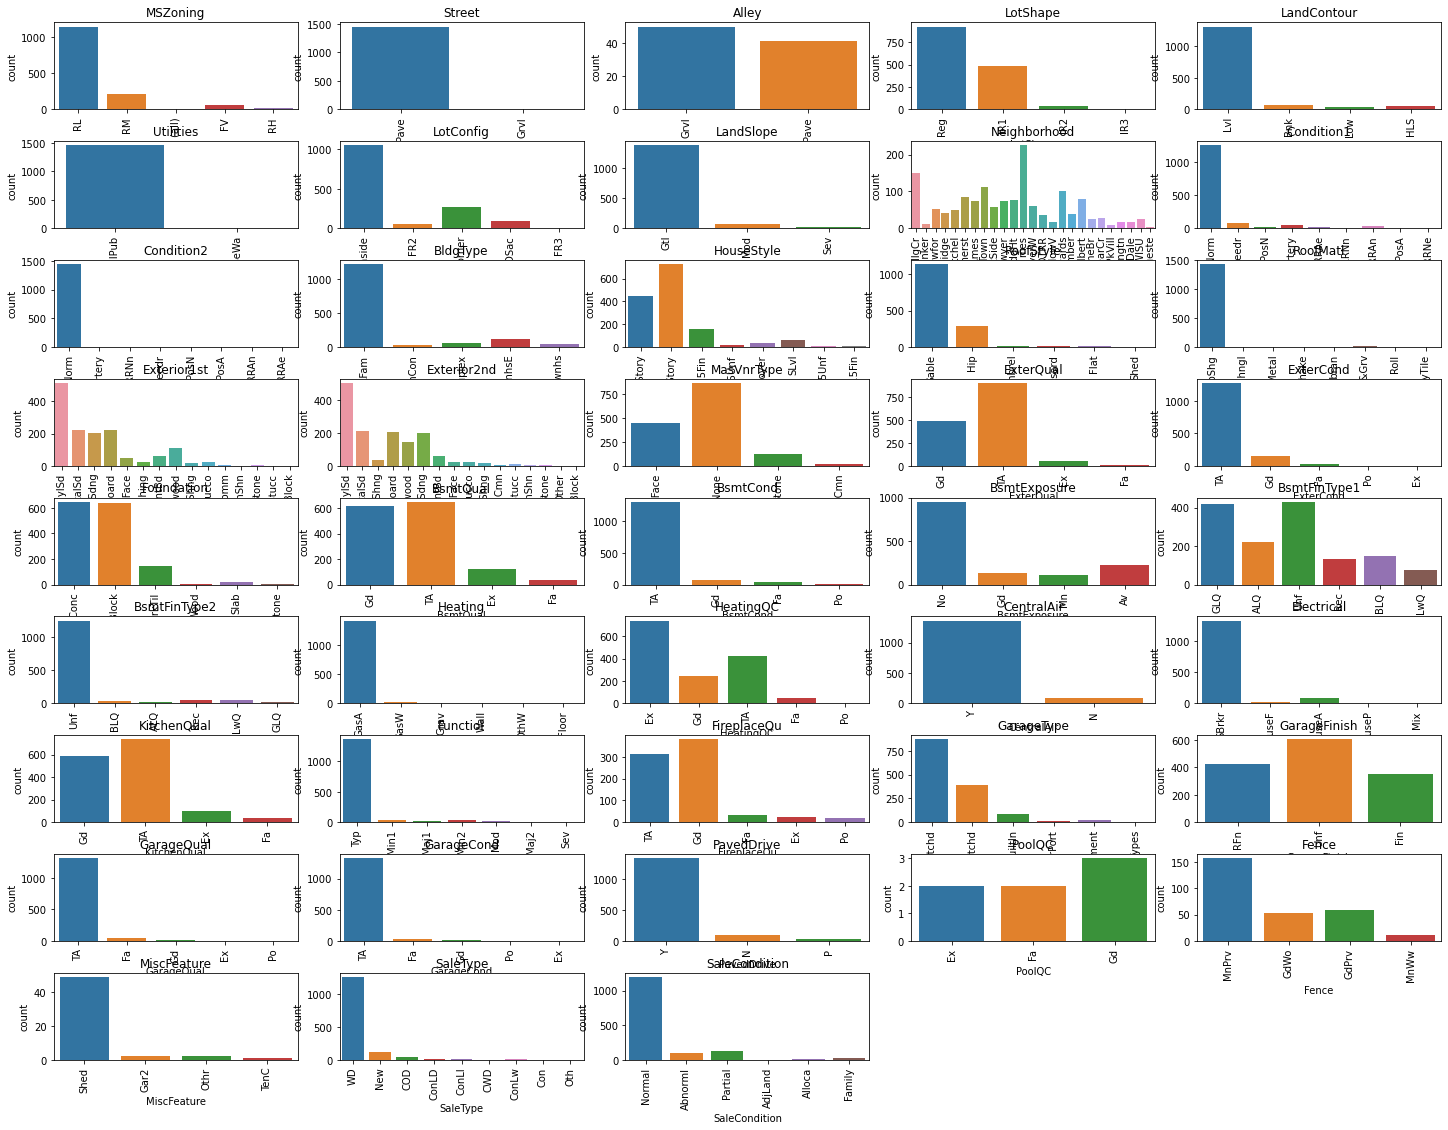

In [18]:
categorical_columns = data.select_dtypes(include=['object']).columns  

# Create a grid of count plots
grid_size = 5  # Number of plots per row/column
num_grids = len(categorical_columns) // grid_size + 1
fig, axes = plt.subplots(num_grids, grid_size, figsize=(20, 15))
fig.tight_layout()

for idx, column in enumerate(categorical_columns):
    row = idx // grid_size
    col = idx % grid_size
    ax = axes[row, col]

    # Create count plot using seaborn
    sns.countplot(data=data, x=column, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(column)

# Hide any empty subplots
for idx in range(len(categorical_columns), num_grids * grid_size):
    row = idx // grid_size
    col = idx % grid_size
    axes[row, col].axis('off')

plt.show()


### c.	Identify significant variables using p-values and Chi-Square values

In [19]:
from scipy.stats import chi2_contingency


categorical_columns = newcatdata.select_dtypes(include=['object']).columns

# Create an empty DataFrame to store p-values and Chi-Square values
chi_square_results = pd.DataFrame(columns=['Variable1', 'Variable2', 'P-Value', 'Chi-Square'])

# Perform Chi-Square tests for pairs of categorical variables
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:  # Avoid testing the same variable against itself
            contingency_table = pd.crosstab(data[col1], data[col2])
            chi2, p, _, _ = chi2_contingency(contingency_table)
            chi_square_results = chi_square_results.append({'Variable1': col1, 'Variable2': col2, 'P-Value': p, 'Chi-Square': chi2}, ignore_index=True)

# Define a significance level (e.g., 0.05)
significance_level = 0.05

# Identify significant variables using p-values and Chi-Square values
significant_variables = chi_square_results[chi_square_results['P-Value'] < significance_level]

# Print significant variables
print("Significant Variables:")
print(significant_variables)


Significant Variables:
          Variable1     Variable2   P-Value   Chi-Square
0          MSZoning        Street       0.0    94.741584
1          MSZoning      LotShape       0.0   113.249403
2          MSZoning   LandContour       0.0    57.575368
4          MSZoning     LotConfig  0.000846    39.751809
5          MSZoning     LandSlope  0.003319    23.035272
...             ...           ...       ...          ...
1475  SaleCondition   FireplaceQu       0.0    80.773037
1476  SaleCondition    GarageType       0.0   117.856544
1477  SaleCondition  GarageFinish       0.0   108.851714
1480  SaleCondition    PavedDrive  0.000006    42.584773
1481  SaleCondition      SaleType       0.0  1652.675077

[1062 rows x 4 columns]


In [20]:
significant_column_names = significant_variables['Variable1'].unique()
data_with_significant_variables = data[significant_column_names]

## 5.	Combine all the significant categorical and numerical variables

In [21]:
num1=numerical_data[significant_correlations.columns]


In [22]:
cat1 =categorical_data[data_with_significant_variables.columns]
cat1

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functiol,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,Norm,...,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal


In [23]:
newdataframe = pd.concat([num1,cat1],axis=1)
newdataframe

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,KitchenQual,Functiol,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,65.0,7,2003,2003,196.0,706,150,856,856,854,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,80.0,6,1976,1976,0.0,978,284,1262,1262,0,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,68.0,7,2001,2002,162.0,486,434,920,920,866,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,60.0,7,1915,1970,0.0,216,540,756,961,756,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,84.0,8,2000,2000,350.0,655,490,1145,1145,1053,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,6,1999,2000,0.0,0,953,953,953,694,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,85.0,6,1978,1988,119.0,790,589,1542,2073,0,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,66.0,7,1941,2006,0.0,275,877,1152,1188,1152,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,68.0,5,1950,1996,0.0,49,0,1078,1078,0,...,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal


In [24]:
numcols = newdataframe.select_dtypes(exclude='object').columns

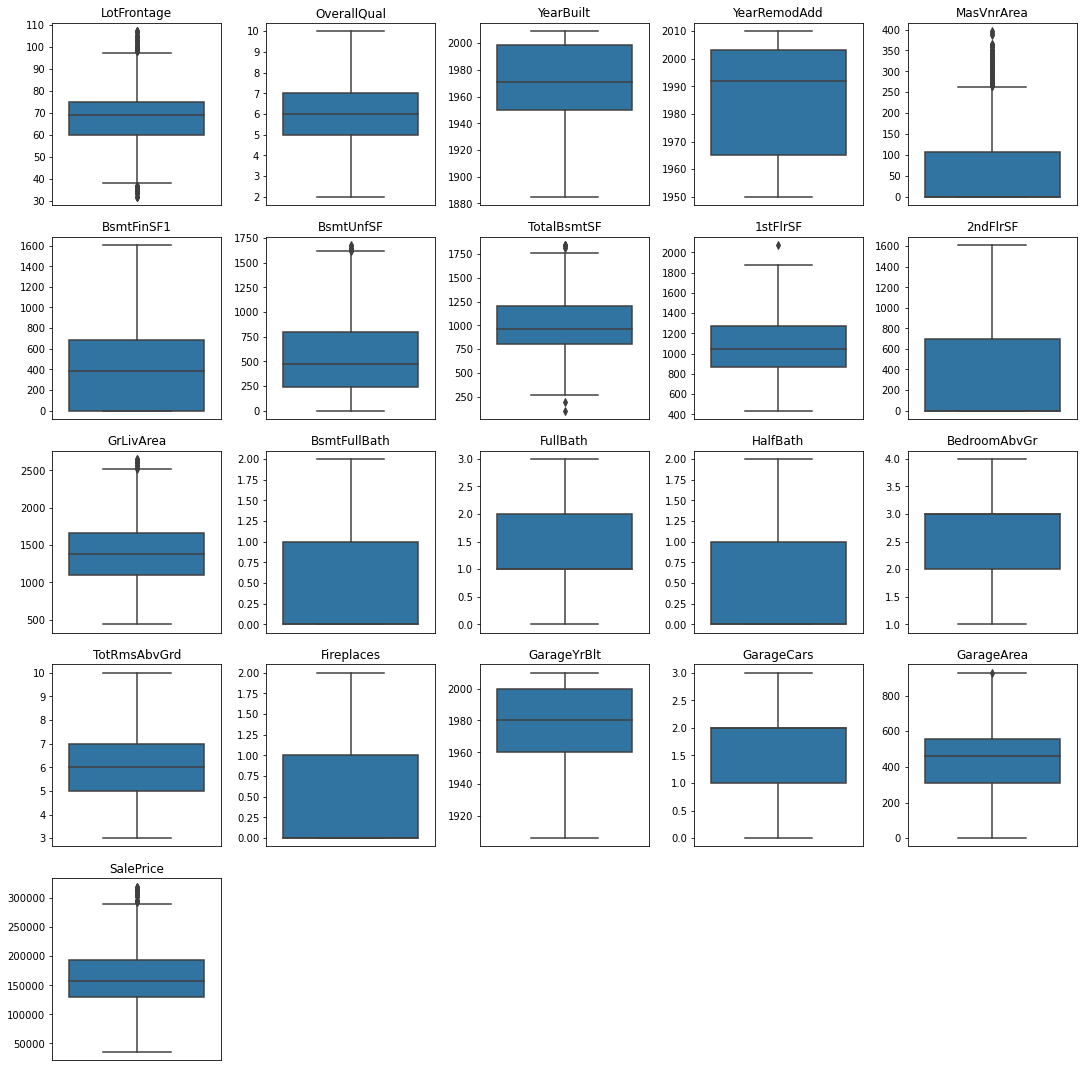

In [25]:

# Calculate IQR for each numerical column
iqr_values = {}
columns_for_iqr = newdataframe.select_dtypes(include=['int64', 'float64']).columns
for column in columns_for_iqr:
    Q1 = newdataframe[column].quantile(0.25)
    Q3 = newdataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    iqr_values[column] = IQR

# Define outlier multiplier
outlier_multiplier = 1.5

# Identify and remove outliers using IQR
for column in columns_for_iqr:
    Q1 = newdataframe[column].quantile(0.25)
    Q3 = newdataframe[column].quantile(0.75)
    IQR = iqr_values[column]
    lower_bound = Q1 - outlier_multiplier * IQR
    upper_bound = Q3 + outlier_multiplier * IQR
    newdataframe = newdataframe[(newdataframe[column] >= lower_bound) & (newdataframe[column] <= upper_bound)]

# Plot box plots in groups of 5 per row
num_plots_per_row = 5
num_columns = len(columns_for_iqr)
num_rows = int(np.ceil(num_columns / num_plots_per_row))

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 3 * num_rows))
fig.tight_layout()

for idx, column in enumerate(columns_for_iqr):
    row = idx // num_plots_per_row
    col = idx % num_plots_per_row
    ax = axes[row, col]

    sns.boxplot(data=newdataframe[column], ax=ax)
    ax.set_title(column)
    ax.set_xticks([])  # Remove x-axis ticks for better layout

# Hide any empty subplots
for idx in range(len(columns_for_iqr), num_rows * num_plots_per_row):
    row = idx // num_plots_per_row
    col = idx % num_plots_per_row
    axes[row, col].axis('off')

plt.show()


In [35]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
standard_num= sc.fit_transform(num1)
standard_num

array([[-0.22087509,  0.65147924,  1.05099379, ...,  0.31172464,
         0.35100032,  0.34727322],
       [ 0.46031974, -0.07183611,  0.15673371, ...,  0.31172464,
        -0.06073101,  0.00728832],
       [-0.08463612,  0.65147924,  0.9847523 , ...,  0.31172464,
         0.63172623,  0.53615372],
       ...,
       [-0.1754621 ,  0.65147924, -1.00249232, ..., -1.02685765,
        -1.03391416,  1.07761115],
       [-0.08463612, -0.79515147, -0.70440562, ..., -1.02685765,
        -1.09005935, -0.48852299],
       [ 0.23325479, -0.79515147, -0.20759447, ..., -1.02685765,
        -0.9216238 , -0.42084081]])

In [37]:
pd.DataFrame(standard_num, columns = numcols)

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,-0.220875,0.651479,1.050994,0.878668,0.514104,0.575425,-0.944591,-0.459303,-0.793434,1.161852,...,1.107810,0.789741,1.227585,0.163779,0.912210,-0.951226,1.017598,0.311725,0.351000,0.347273
1,0.460320,-0.071836,0.156734,-0.429577,-0.570750,1.171992,-0.641228,0.466465,0.257140,-0.795163,...,-0.819964,0.789741,-0.761621,0.163779,-0.318683,0.600495,-0.107927,0.311725,-0.060731,0.007288
2,-0.084636,0.651479,0.984752,0.830215,0.325915,0.092907,-0.301643,-0.313369,-0.627826,1.189351,...,1.107810,0.789741,1.227585,0.163779,-0.318683,0.600495,0.934226,0.311725,0.631726,0.536154
3,-0.447940,0.651479,-1.863632,-0.720298,-0.570750,-0.499274,-0.061670,-0.687324,-0.521734,0.937276,...,1.107810,-1.026041,-0.761621,0.163779,0.296763,0.600495,0.809167,1.650307,0.790804,-0.515281
4,0.641972,1.374795,0.951632,0.733308,1.366489,0.463568,-0.174865,0.199680,-0.045611,1.617877,...,1.107810,0.789741,1.227585,1.390023,1.527656,0.600495,0.892540,1.650307,1.698485,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.357114,-0.071836,0.918511,0.733308,-0.570750,-0.973018,0.873321,-0.238122,-0.542435,0.795198,...,-0.819964,0.789741,1.227585,0.163779,0.296763,0.600495,0.850854,0.311725,-0.060731,-0.074560
1456,0.687385,-0.071836,0.222975,0.151865,0.087911,0.759659,0.049262,1.104925,2.355701,-0.795163,...,1.107810,0.789741,-0.761621,0.163779,0.296763,2.152216,-0.024555,0.311725,0.126420,0.366161
1457,-0.175462,0.651479,-1.002492,1.024029,-0.570750,-0.369871,0.701265,0.215641,0.065656,1.844744,...,-0.819964,0.789741,-0.761621,1.390023,1.527656,2.152216,-1.566941,-1.026858,-1.033914,1.077611
1458,-0.084636,-0.795151,-0.704406,0.539493,-0.570750,-0.865548,-1.284176,0.046905,-0.218982,-0.795163,...,1.107810,-1.026041,-0.761621,-1.062465,-0.934130,-0.951226,-1.191766,-1.026858,-1.090059,-0.488523


DataFrame Head:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchebvGr,KitchenQual,TotRmsAbvGrd,Functiol,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


DataFrame Tail:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchebvGr,KitchenQual,TotRmsAbvGrd,Functiol,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


----------------------------------------------------------------------------------------------------
Missing values:


,0
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


----------------------------------------------------------------------------------------------------
MSNO Matrix:



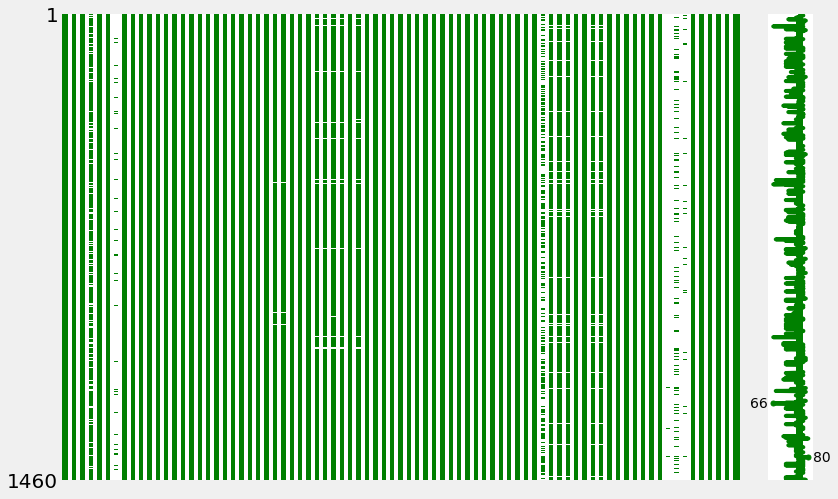

----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(1460, 81)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 

,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
Id,1460,730.5,730.5,421.61,1,365.75,730.5,1095.25,1460,0.018638,-1.188833
MSSubClass,1460,56.897,50,42.301,20,20,50,70,190,1.411016,1.575043
LotFrontage,1201,70.05,69,24.285,21,59,69,80,313,2.248183,18.356938
LotArea,1460,10516.828,9478.5,9981.265,1300,7553.5,9478.5,11601.5,215245,15.587220,366.478603
OverallQual,1460,6.099,6,1.383,1,5,6,7,10,0.287415,-0.150750
OverallCond,1460,5.575,5,1.113,1,5,5,6,9,0.845318,1.057587
YearBuilt,1460,1971.268,1973,30.203,1872,1954,1973,2000,2010,-0.617522,-0.542413
YearRemodAdd,1460,1984.866,1994,20.645,1950,1967,1994,2004,2010,-0.564999,-1.251774
MasVnrArea,1452,103.685,0,181.066,0,0,0,166,1600,2.703321,10.150935
BsmtFinSF1,1460,443.64,383.5,456.098,0,0,383.5,712.25,5644,1.931488,13.154520


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



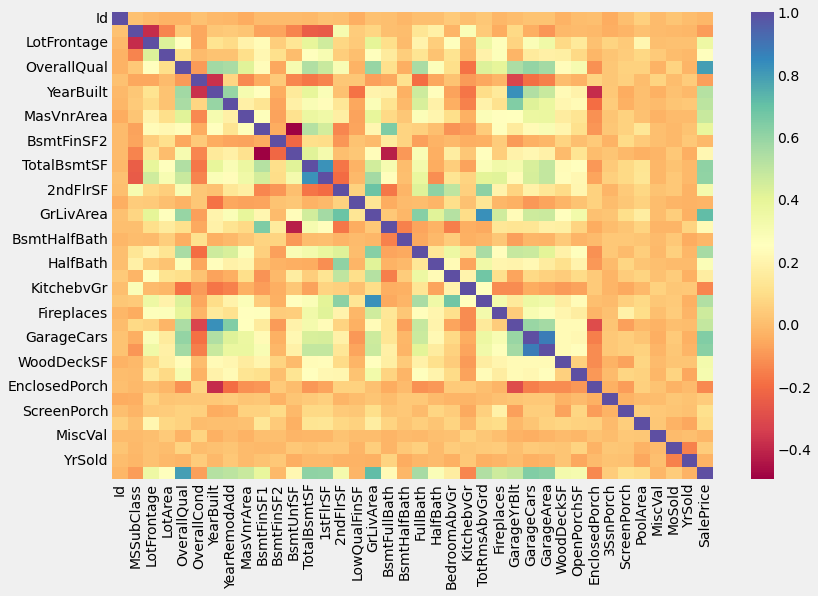

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



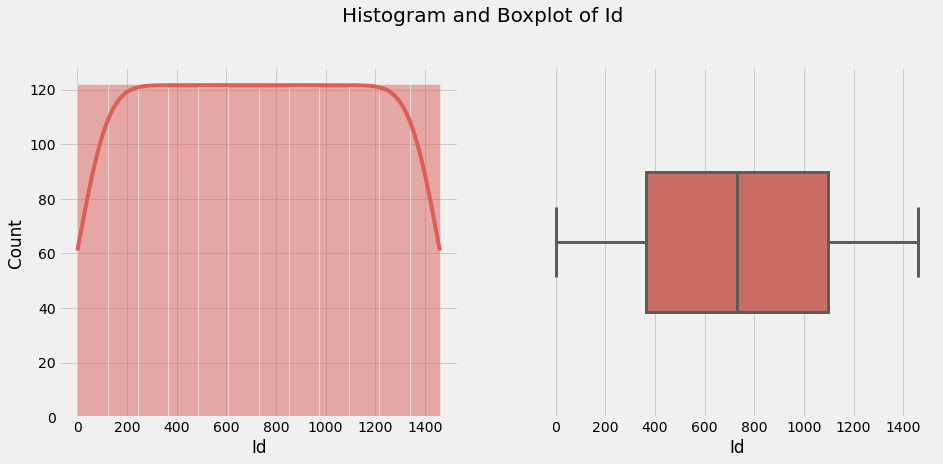

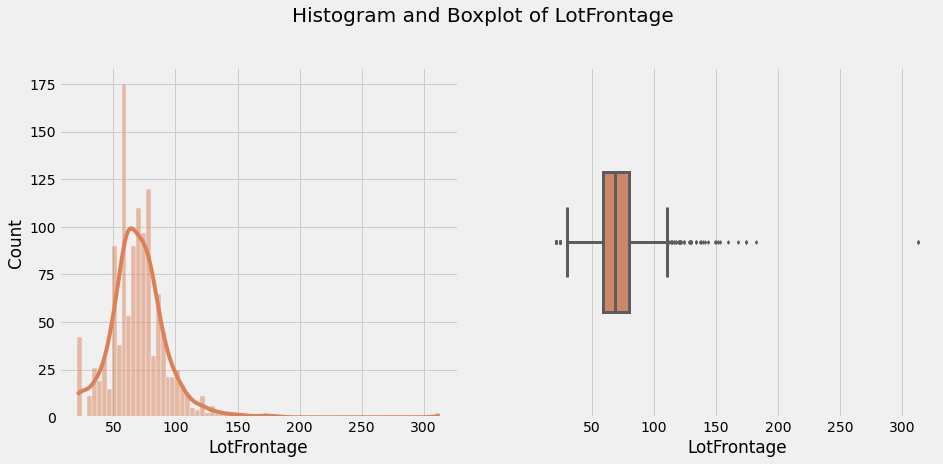

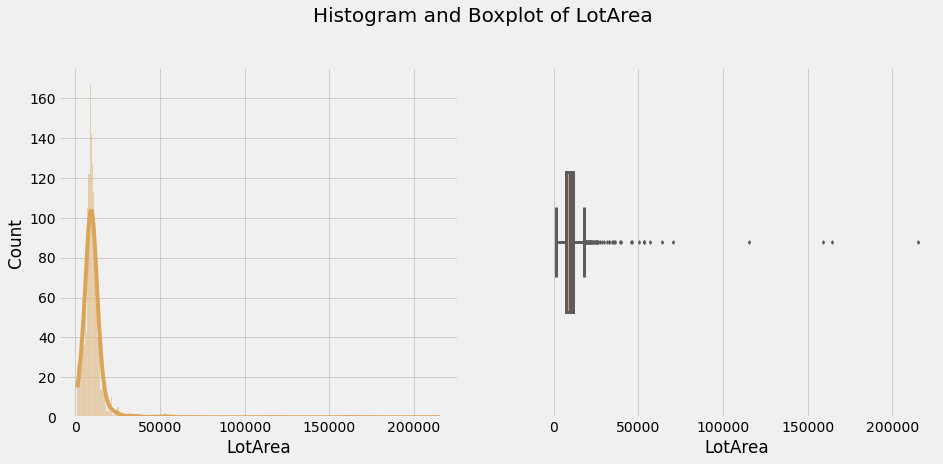

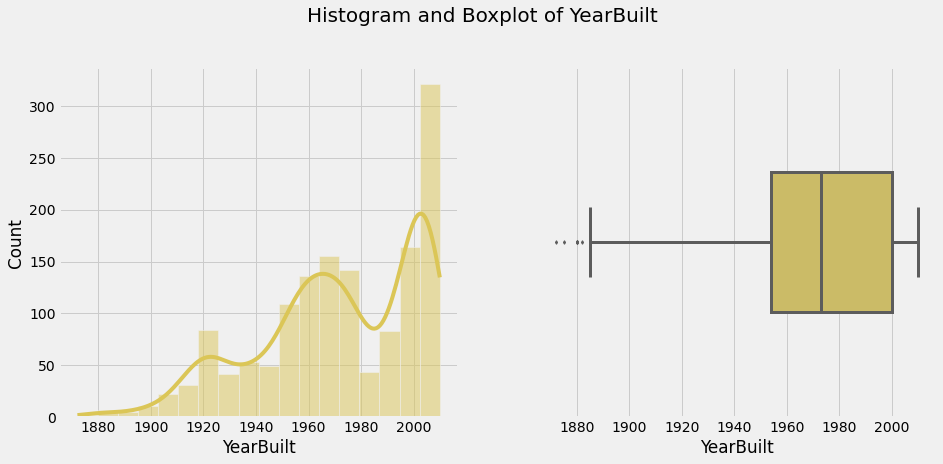

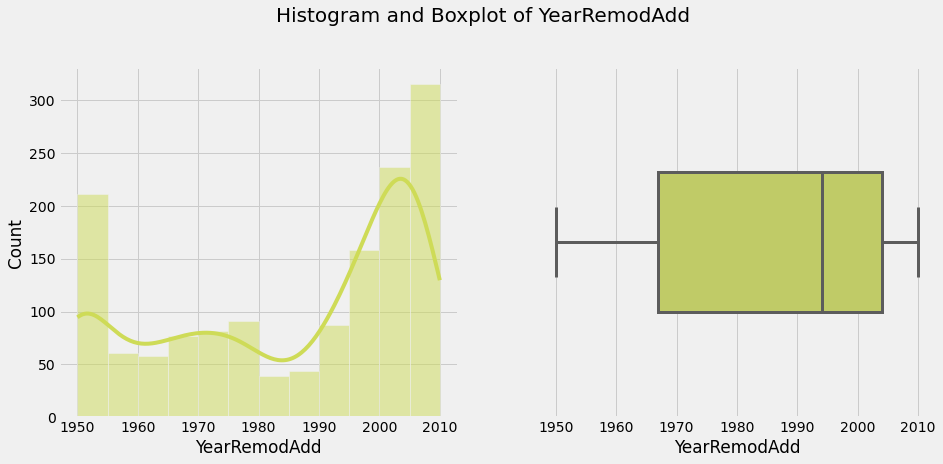

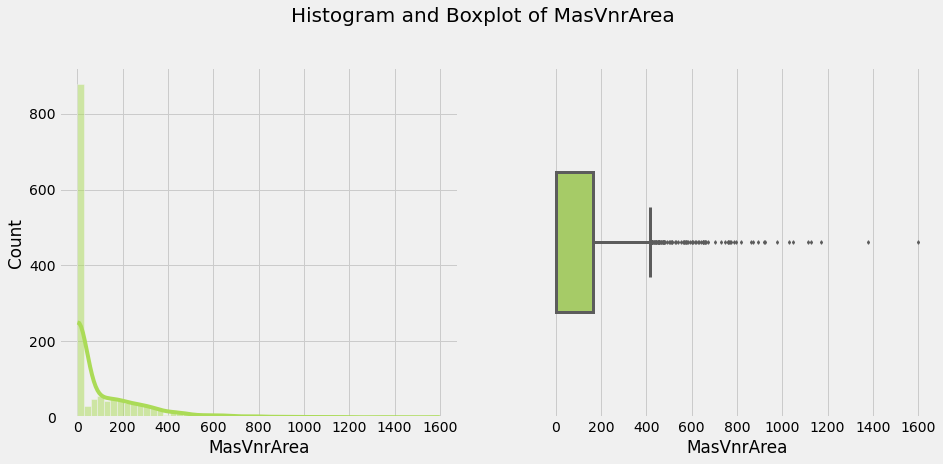

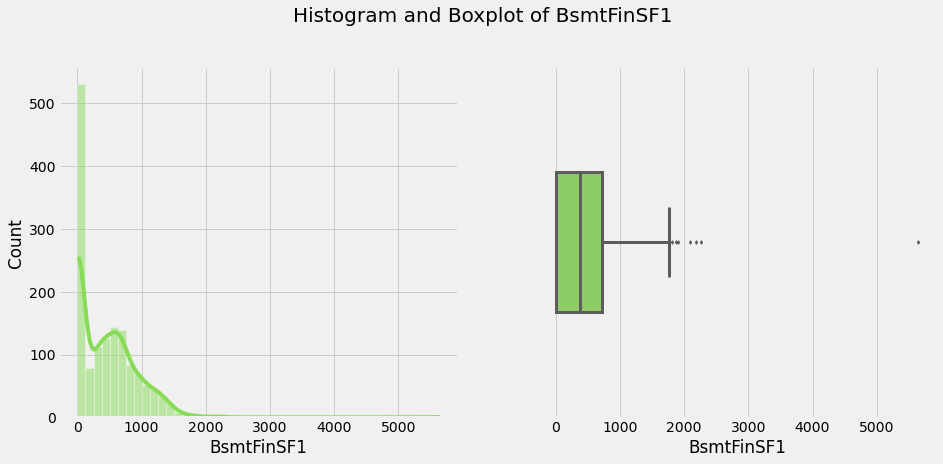

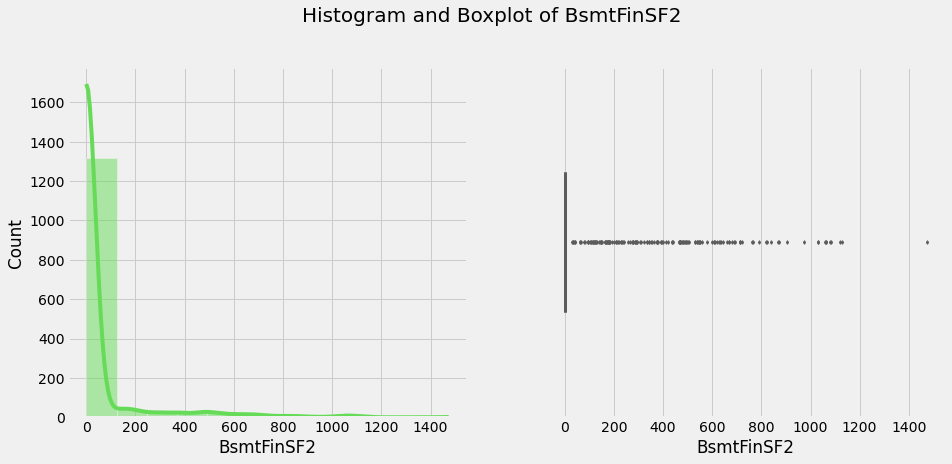

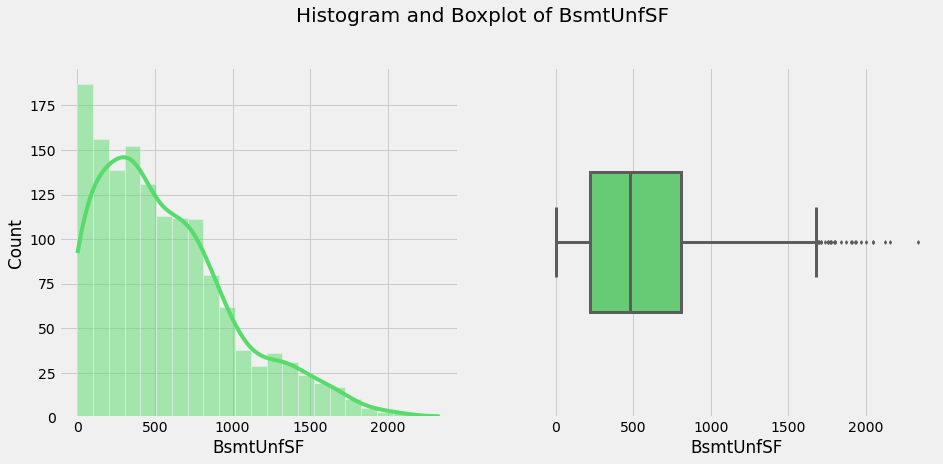

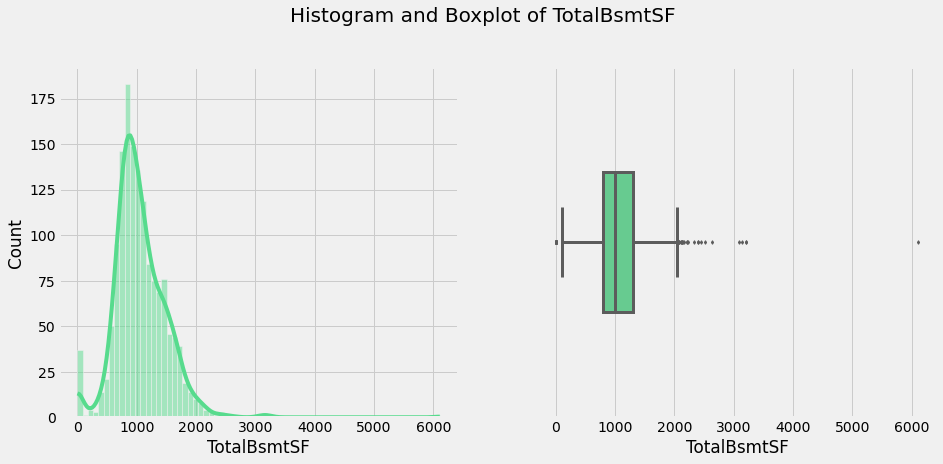

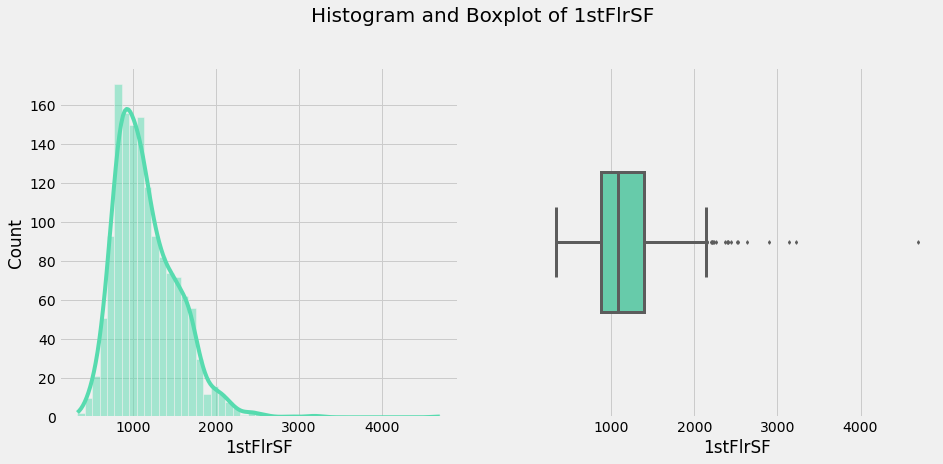

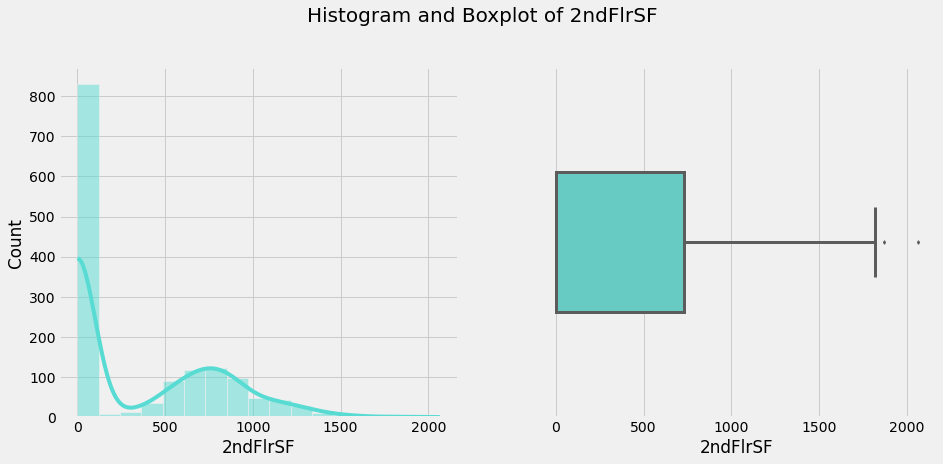

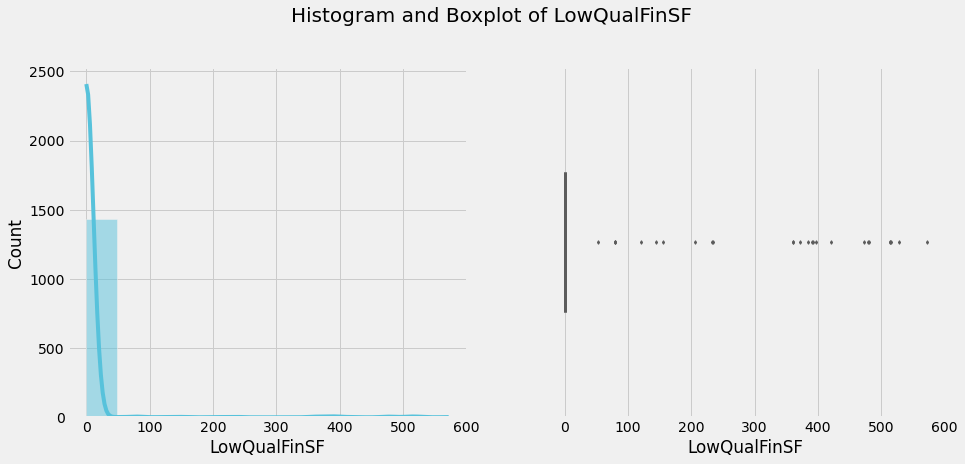

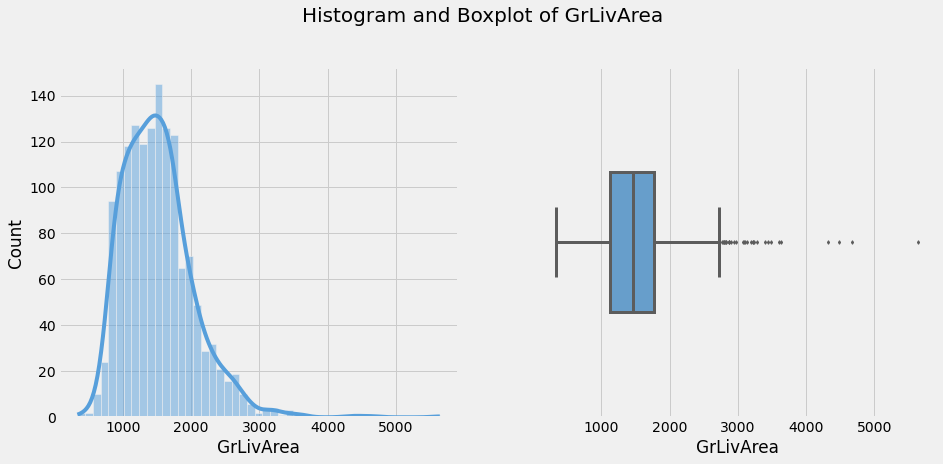

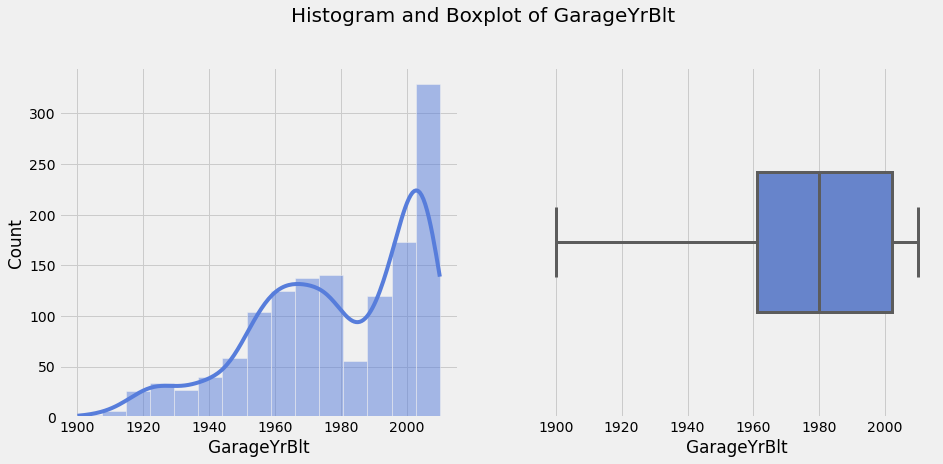

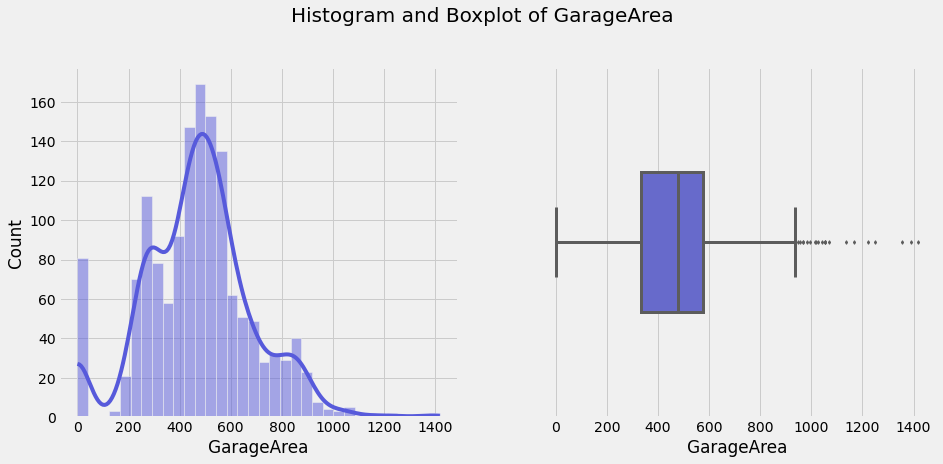

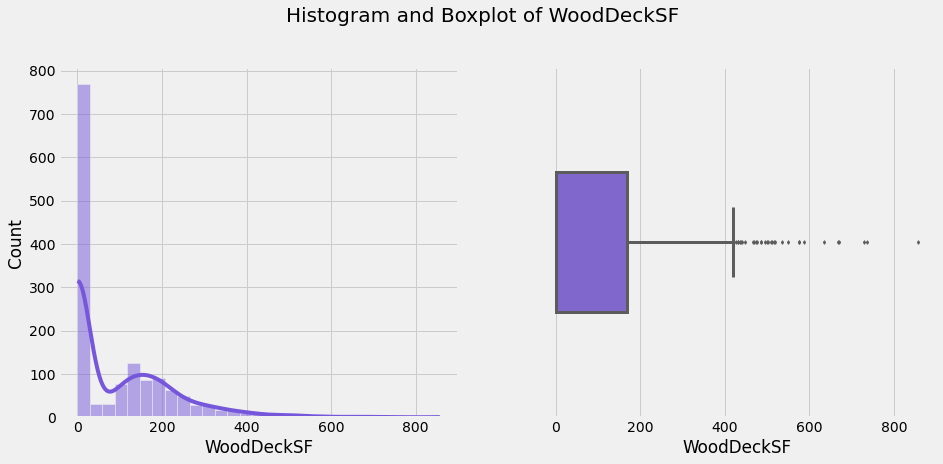

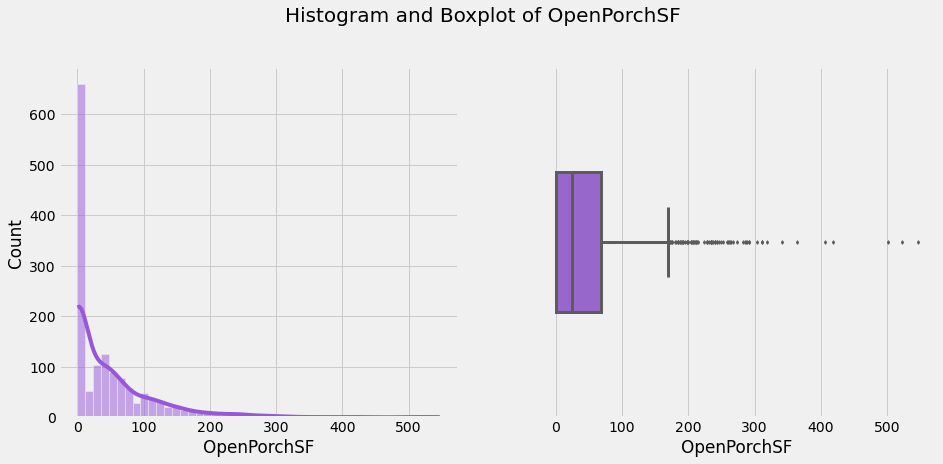

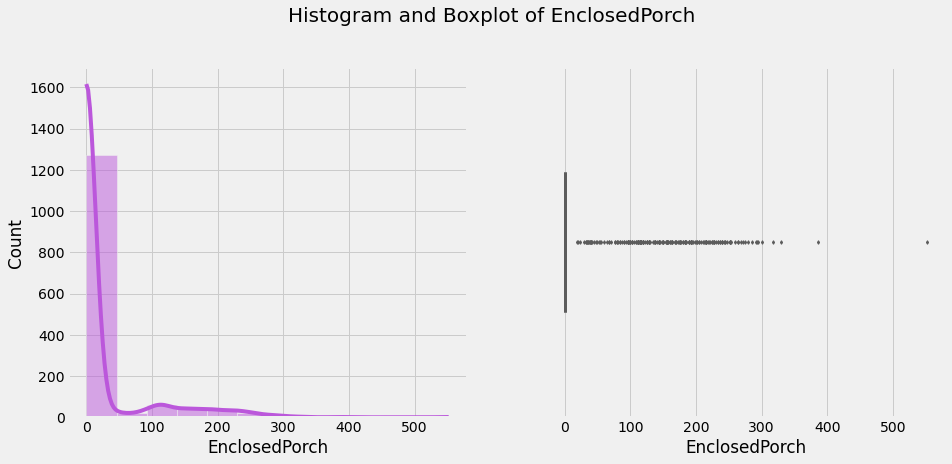

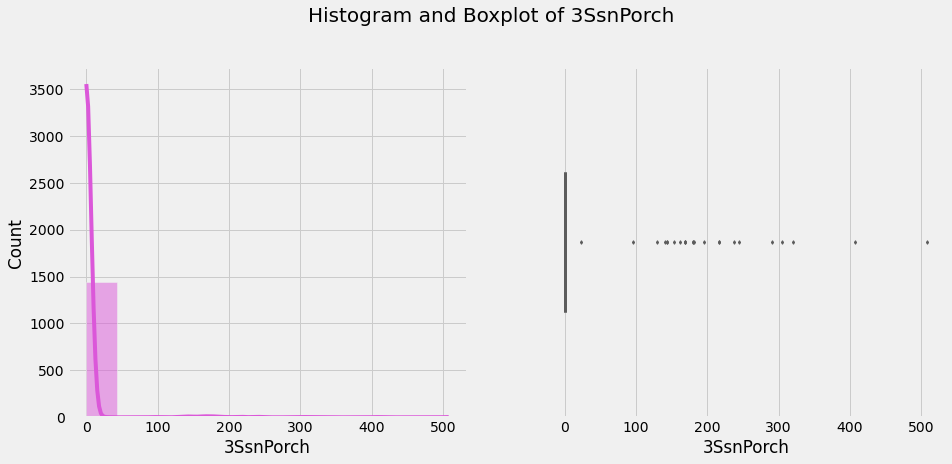

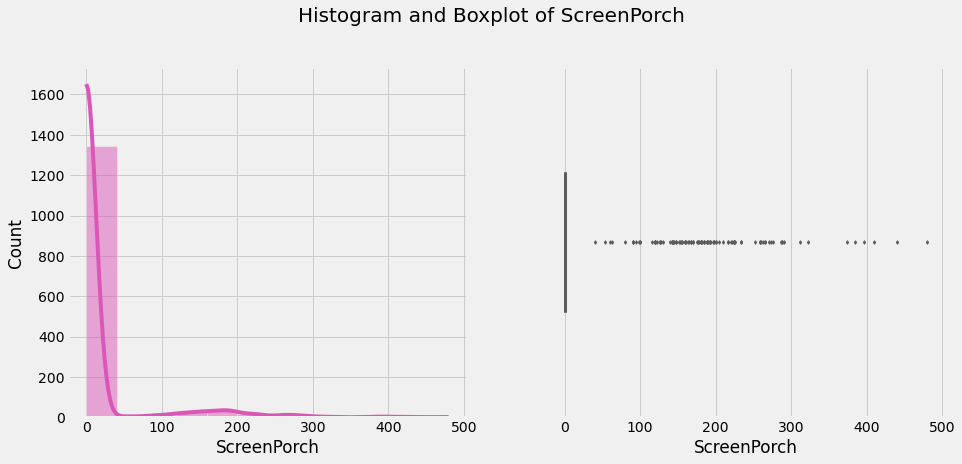

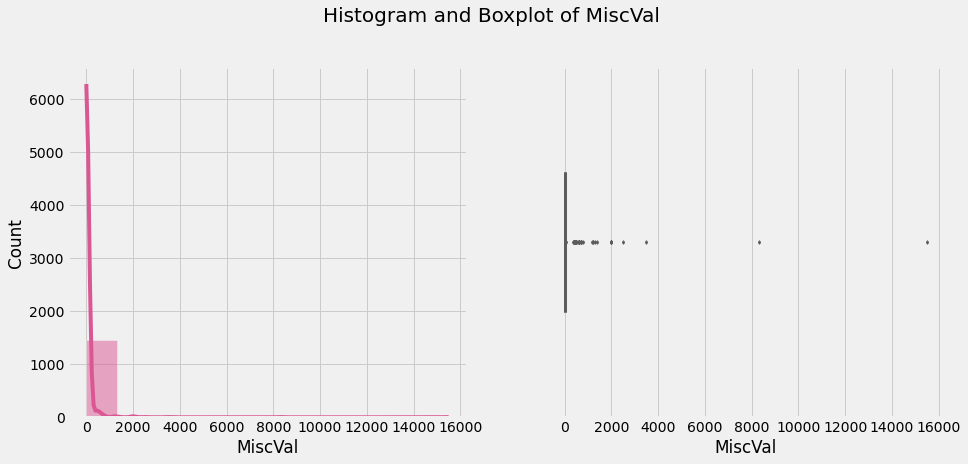

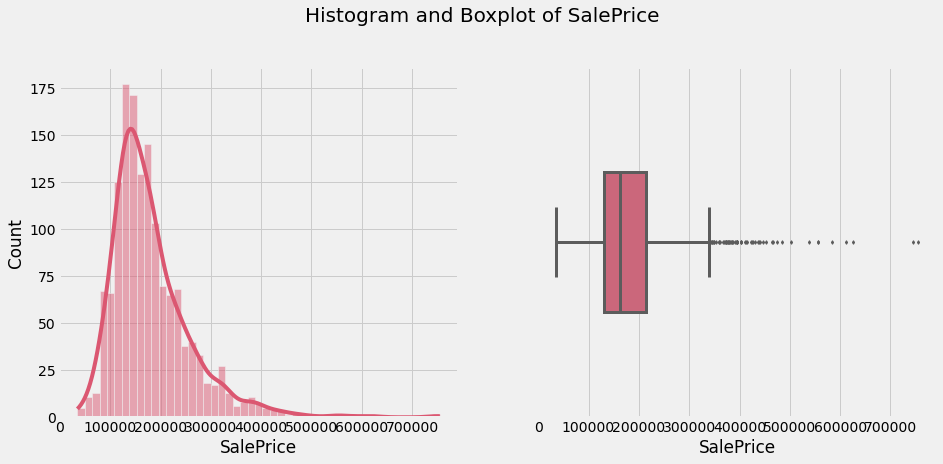

----------------------------------------------------------------------------------------------------
Countplot(s):



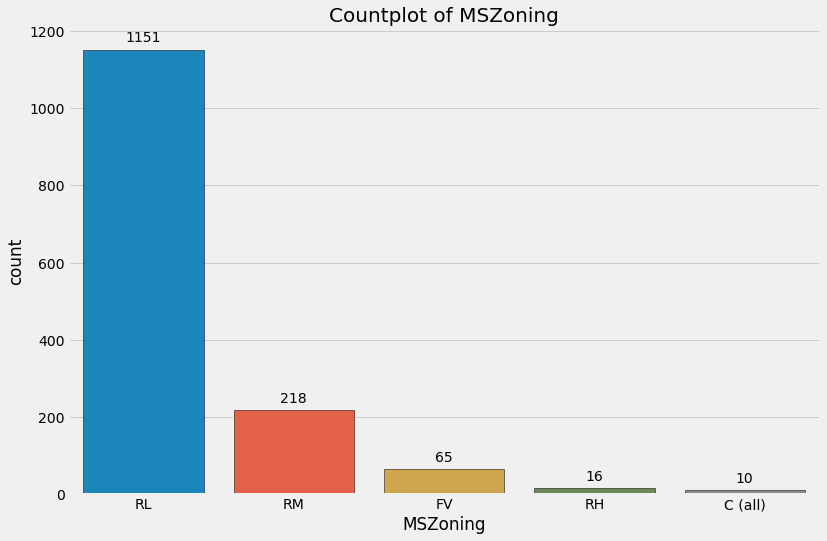

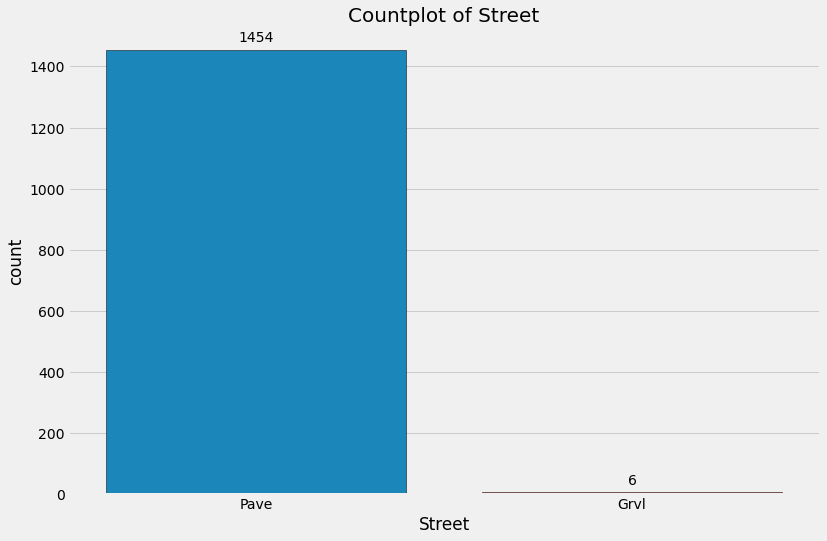

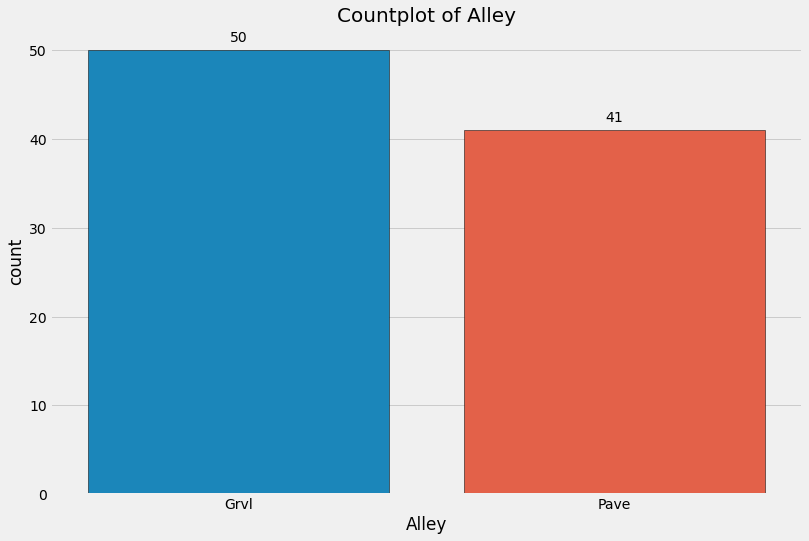

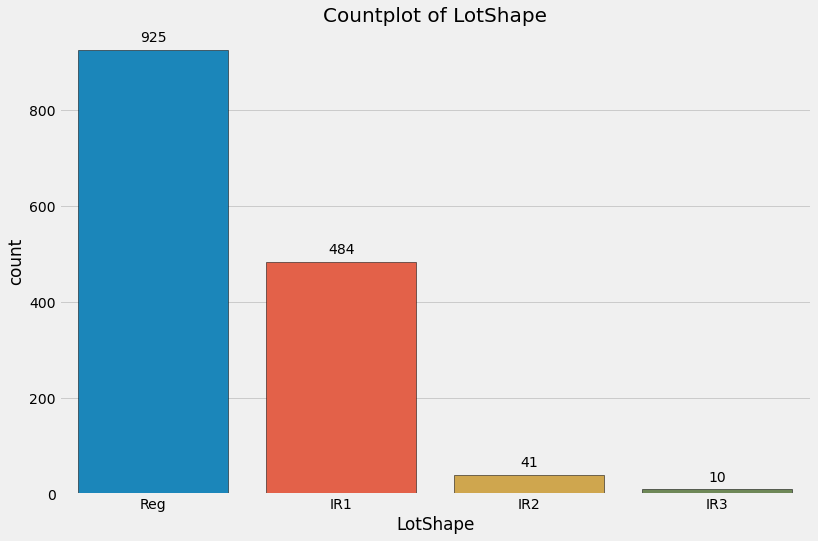

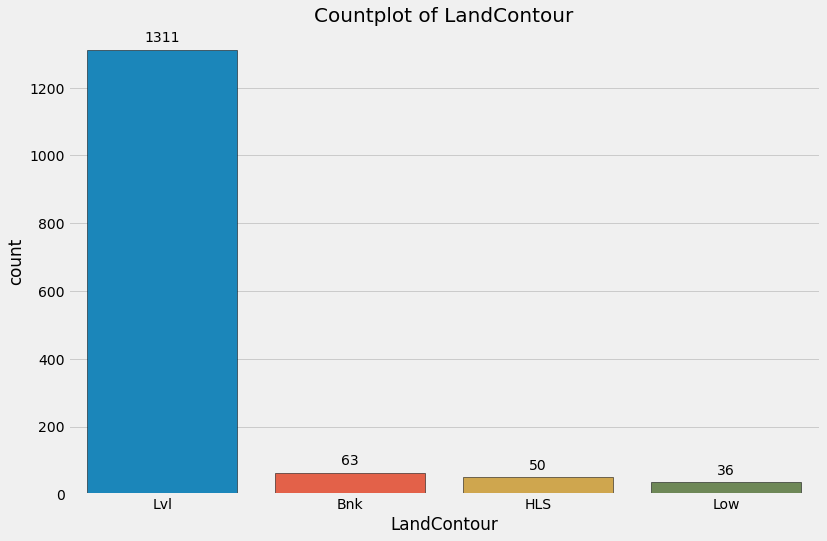

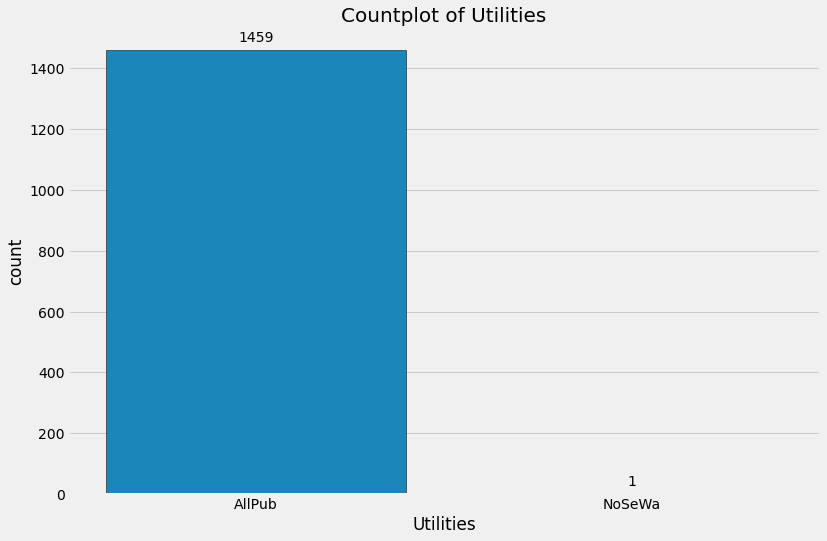

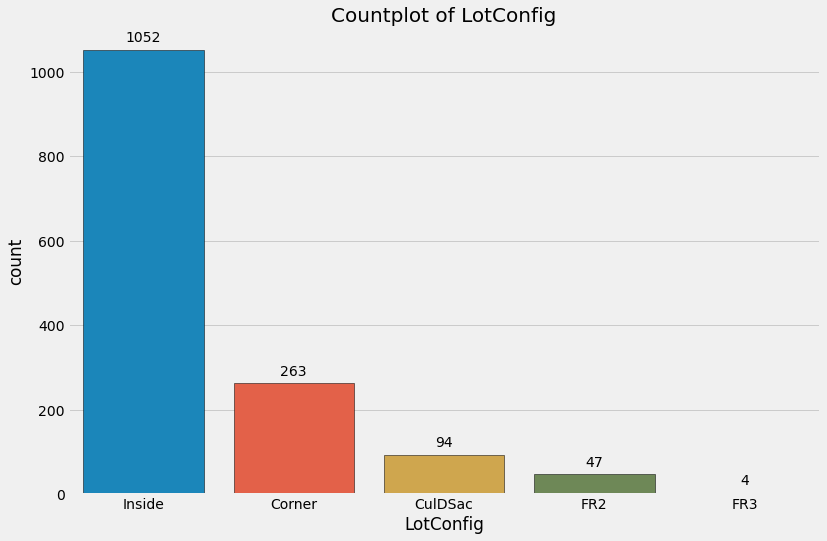

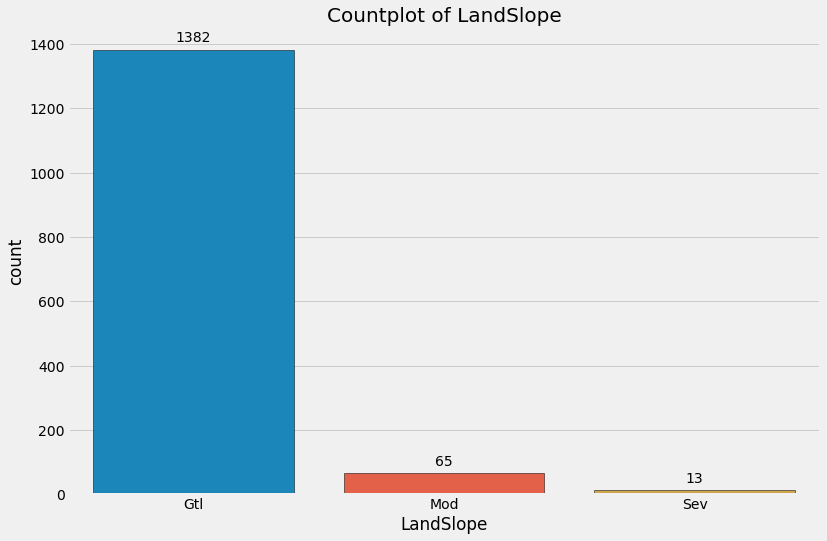

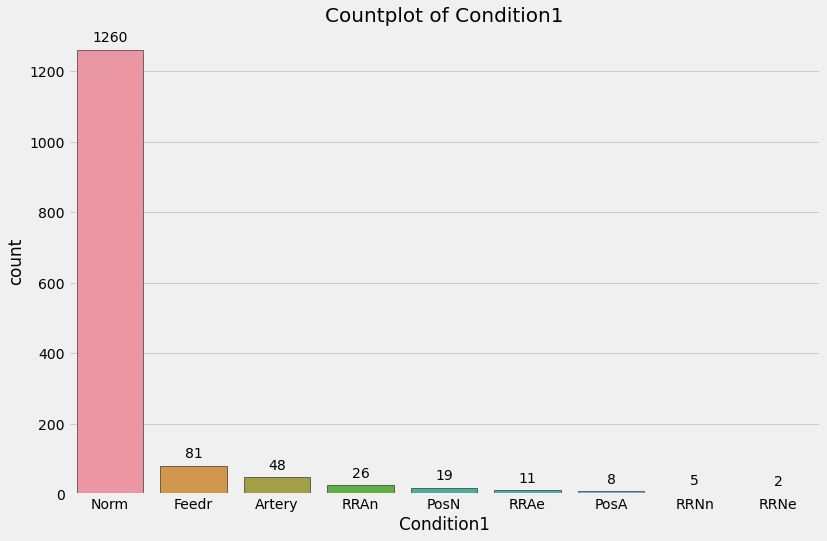

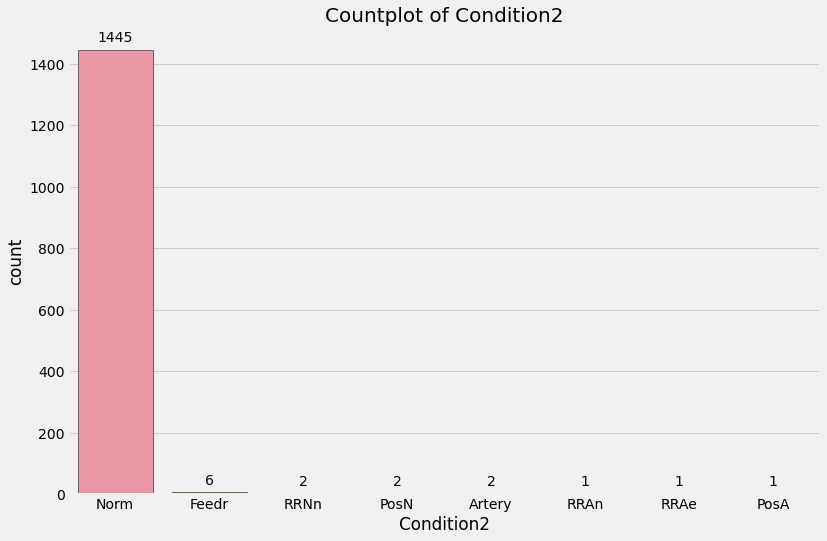

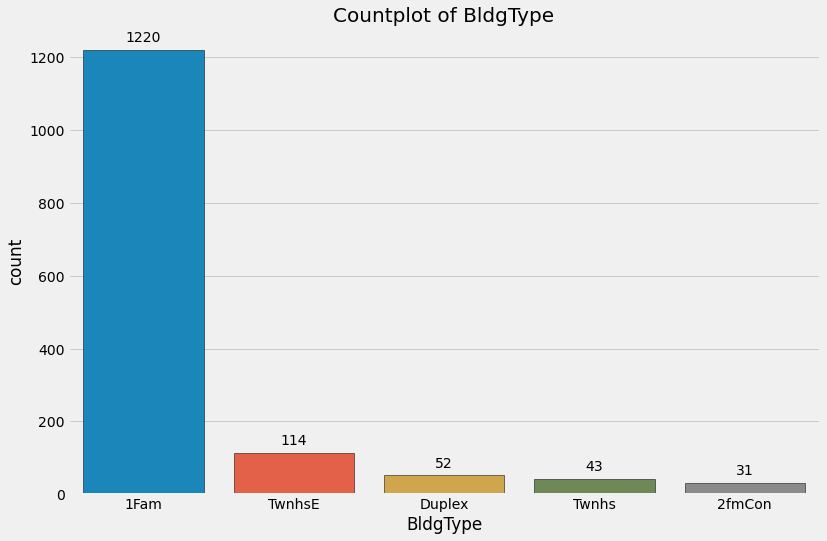

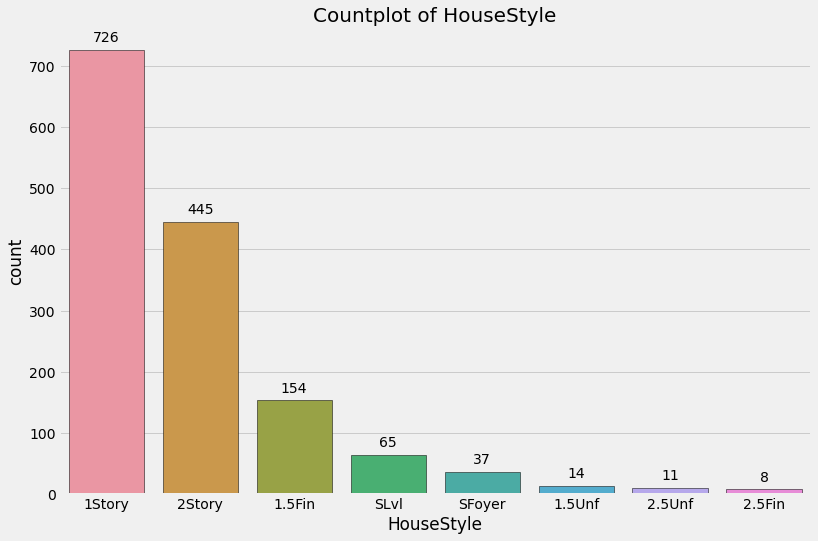

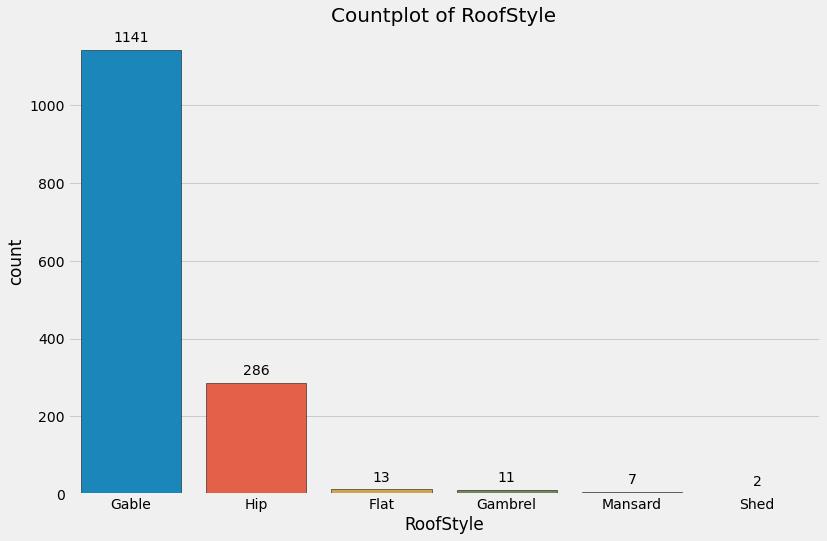

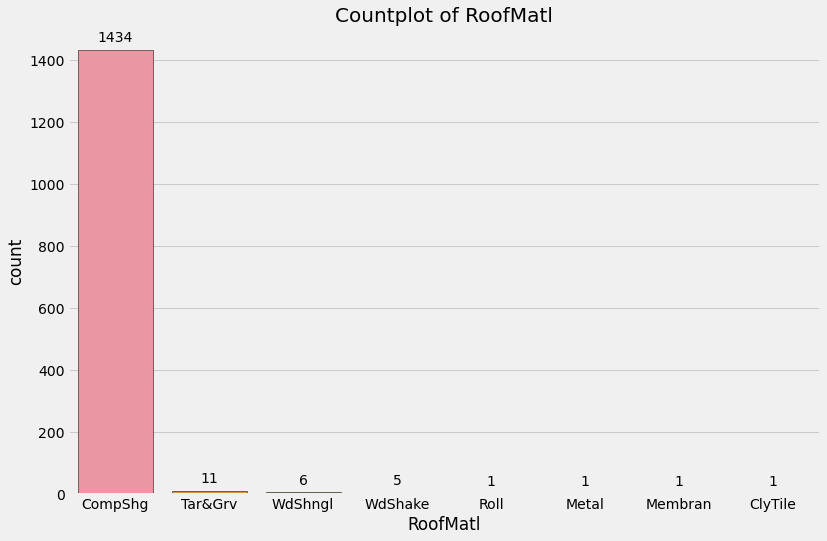

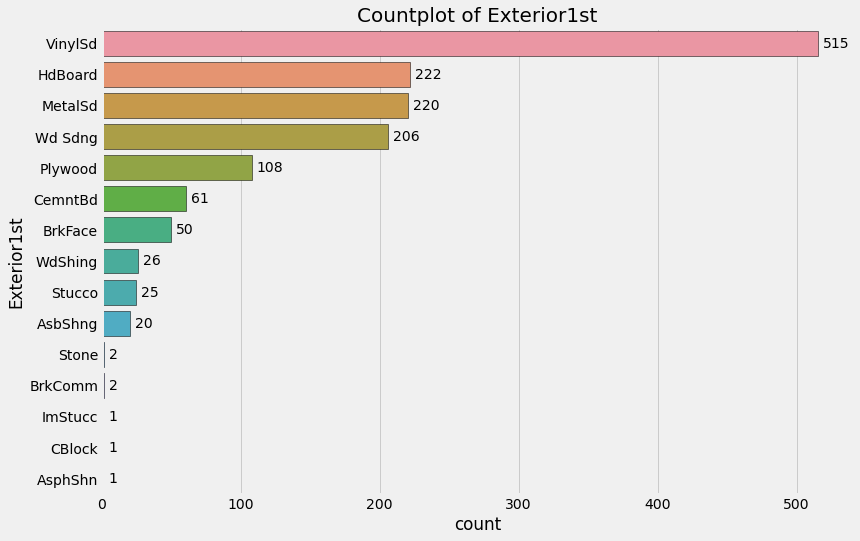

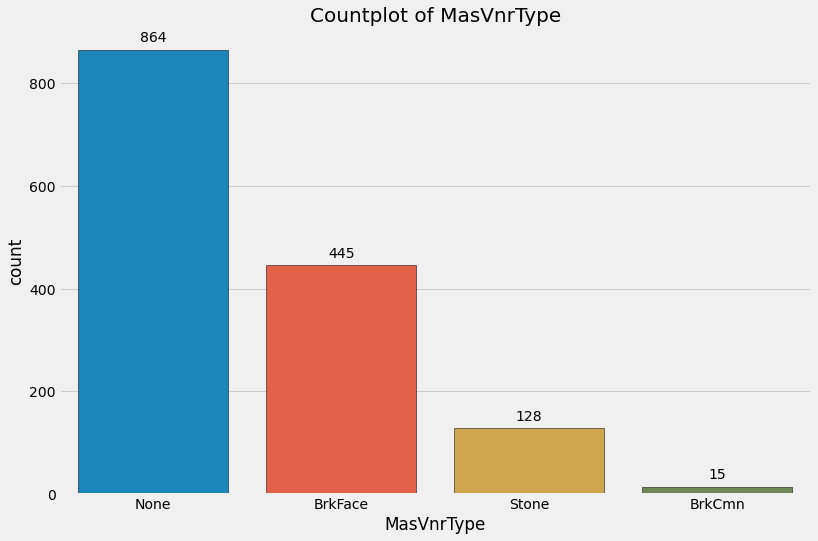

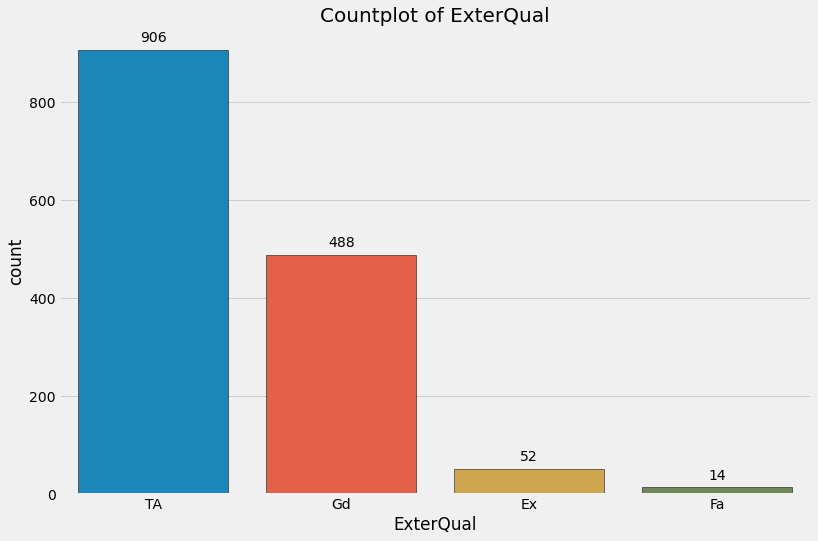

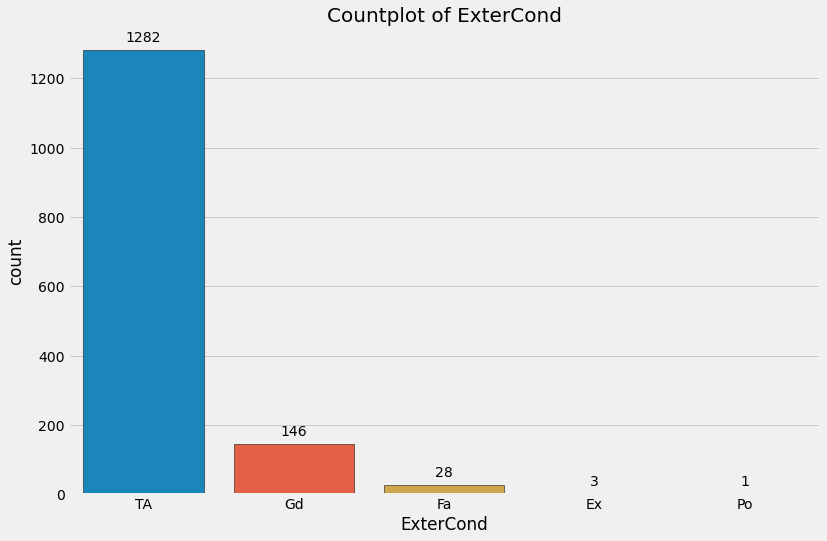

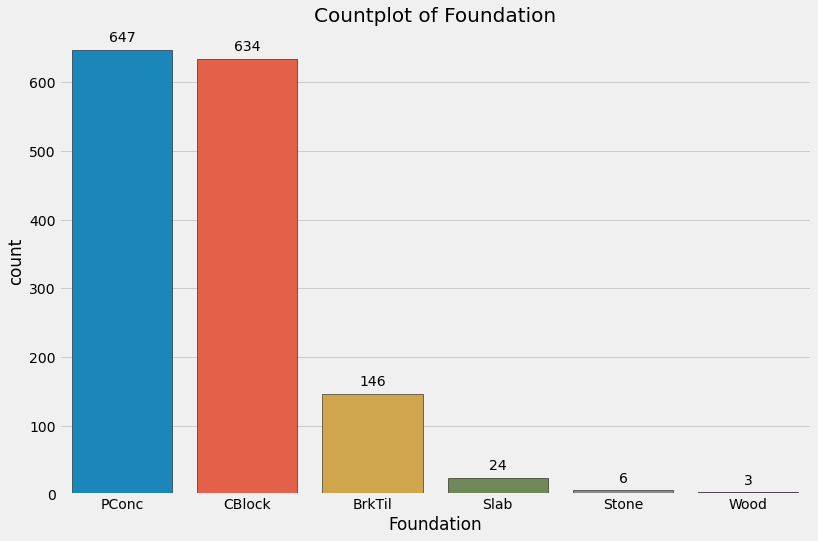

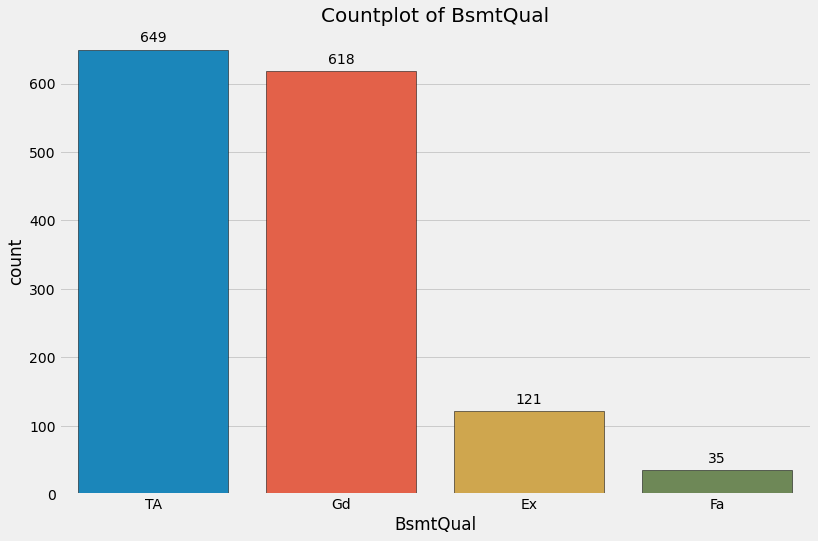

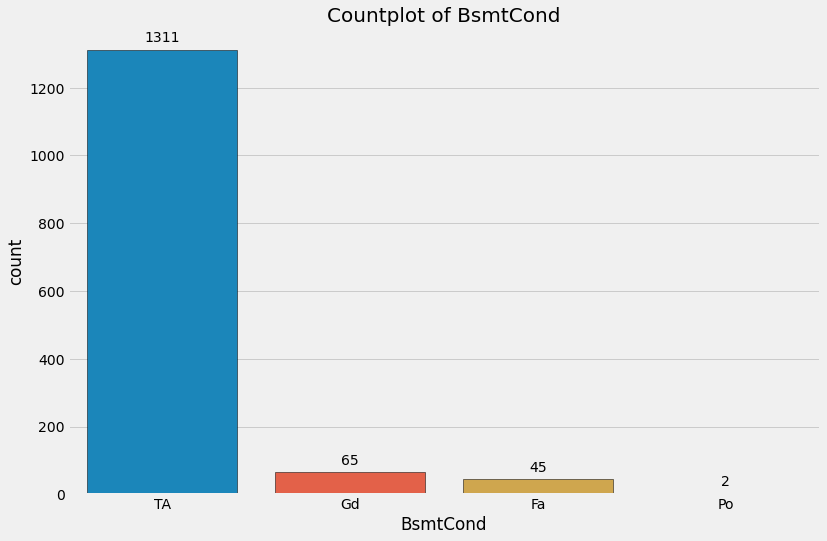

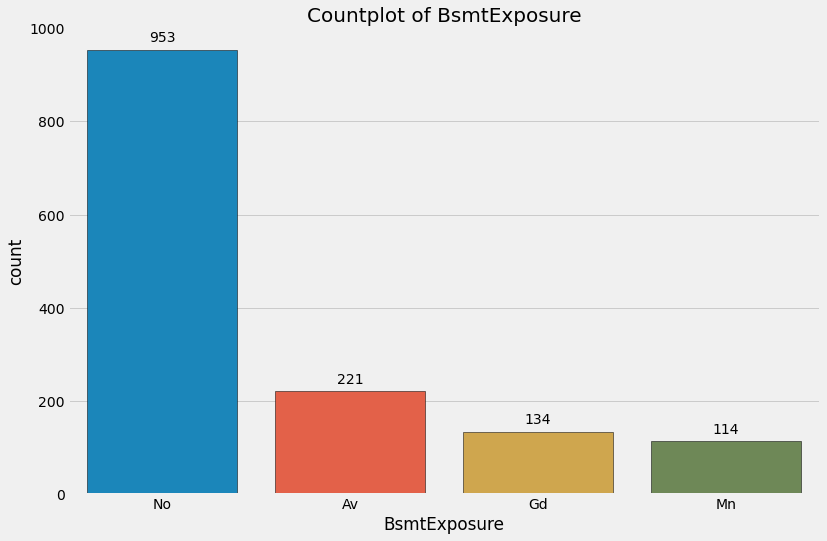

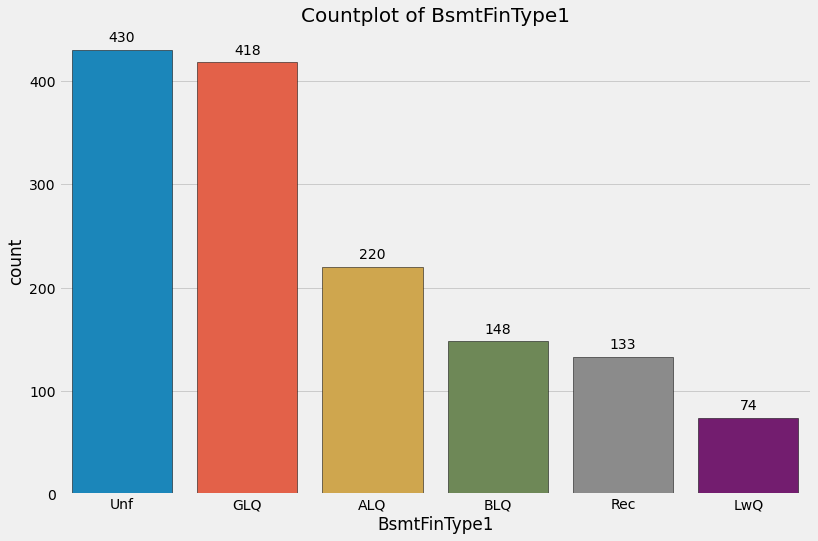

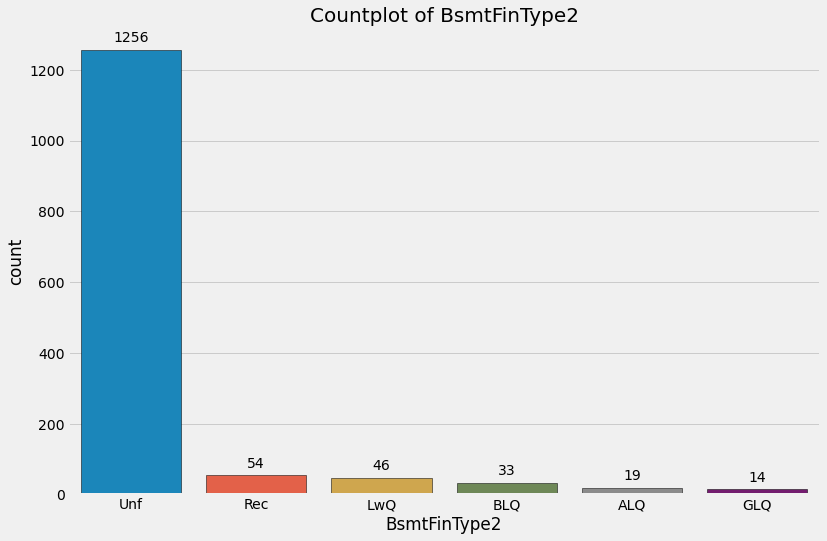

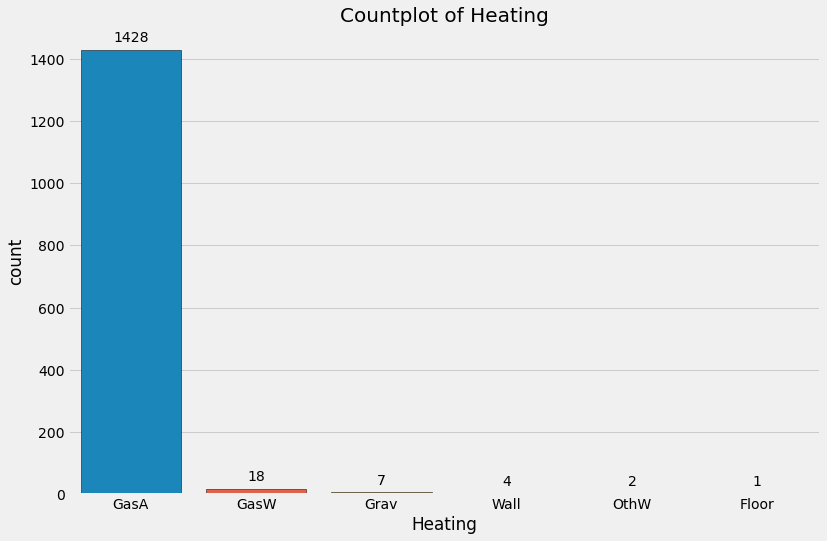

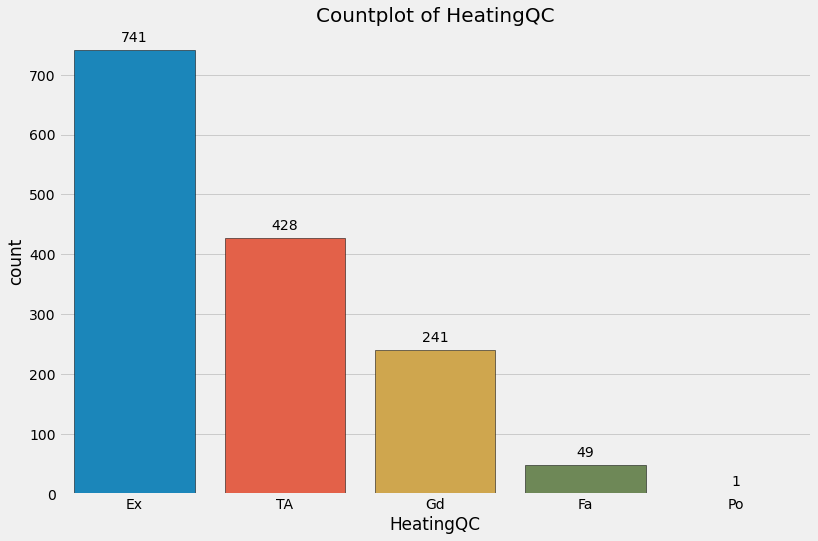

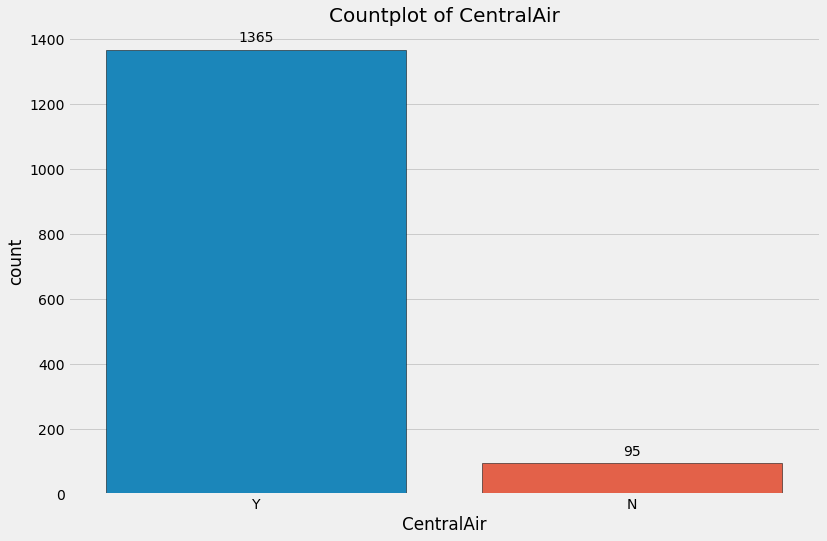

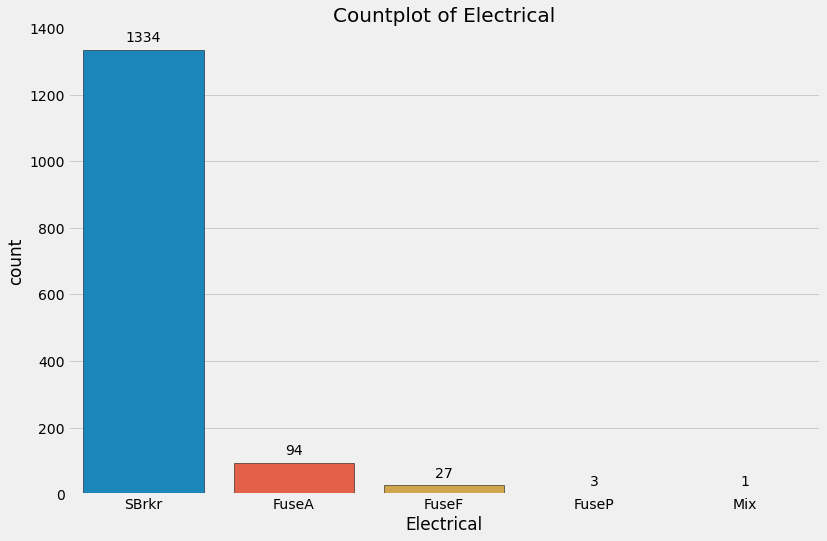

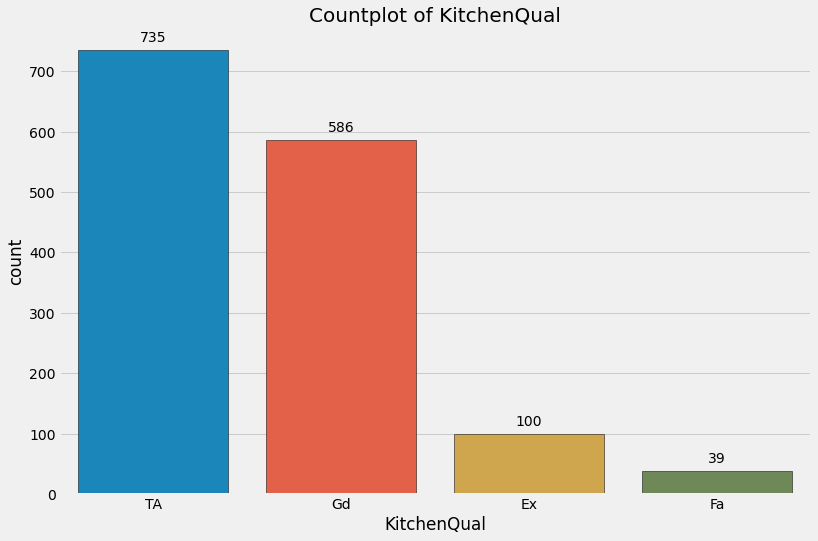

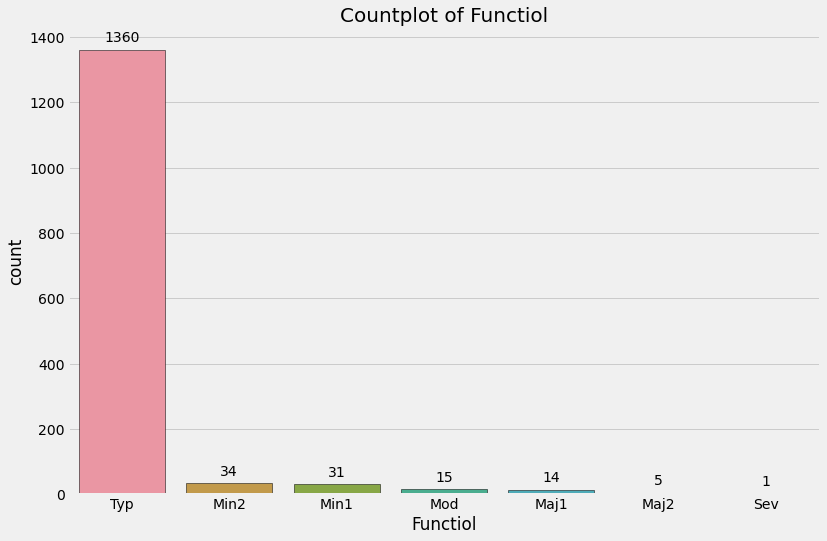

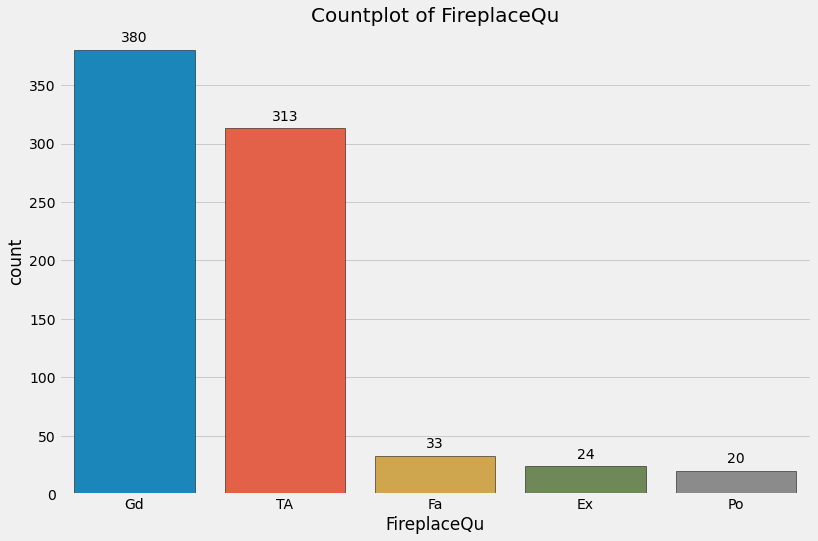

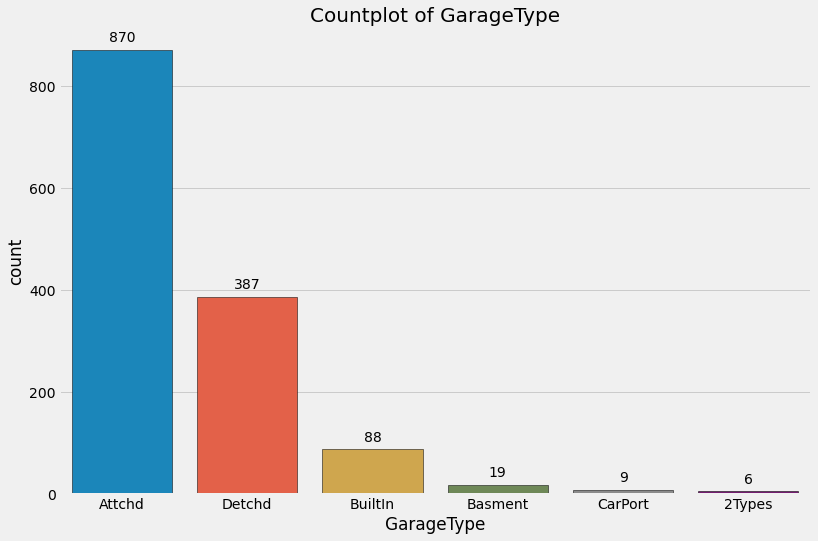

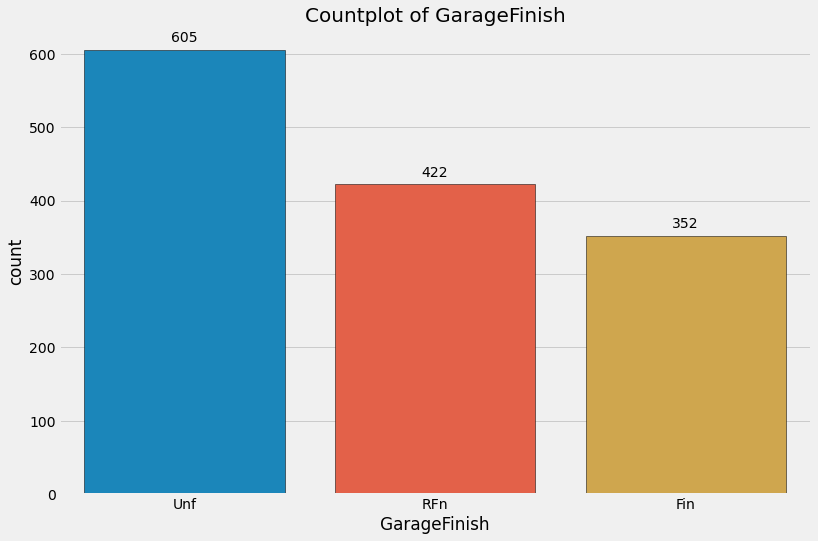

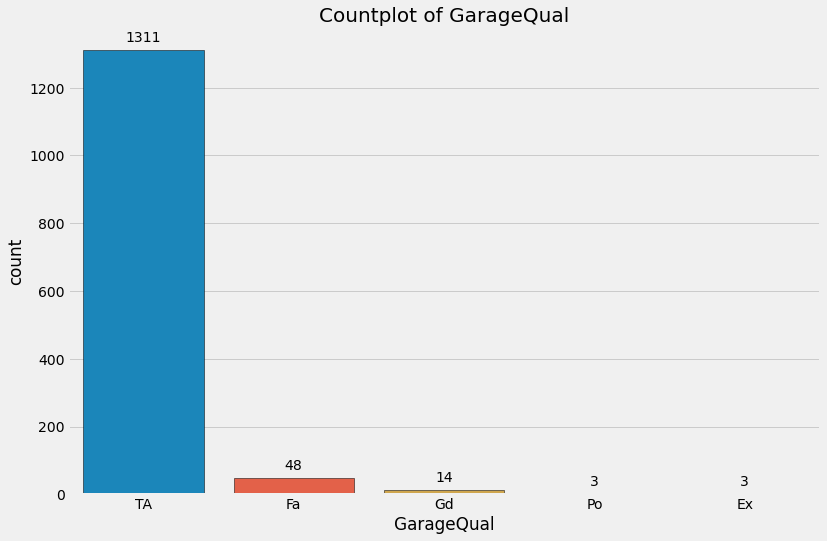

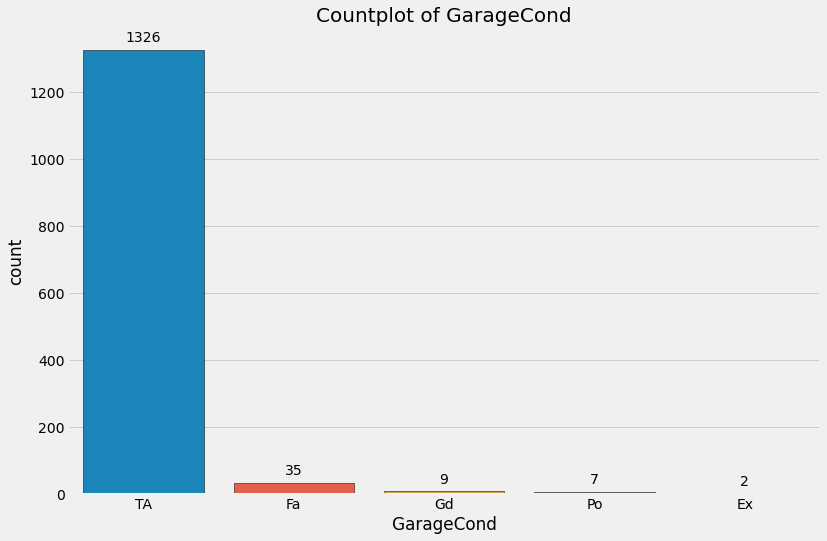

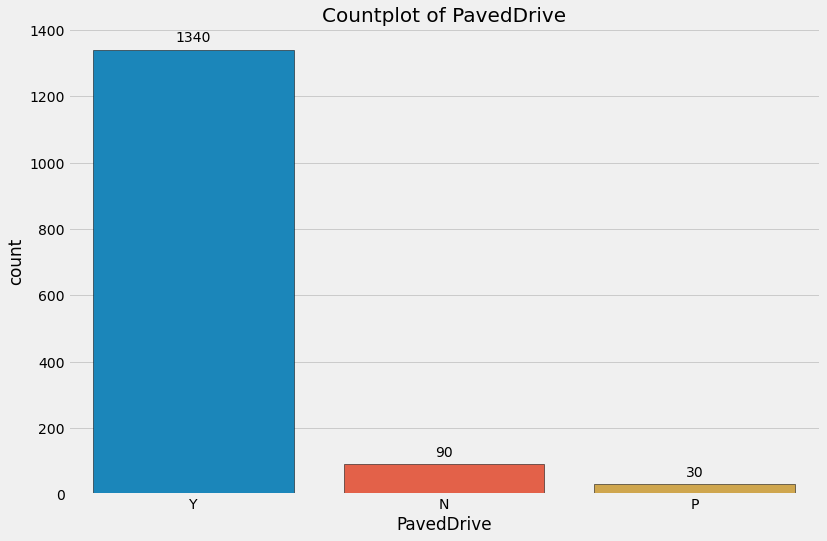

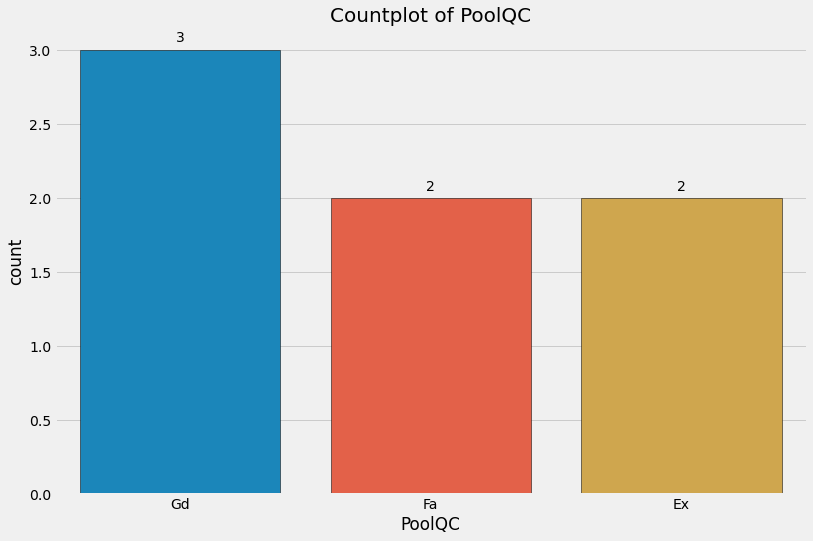

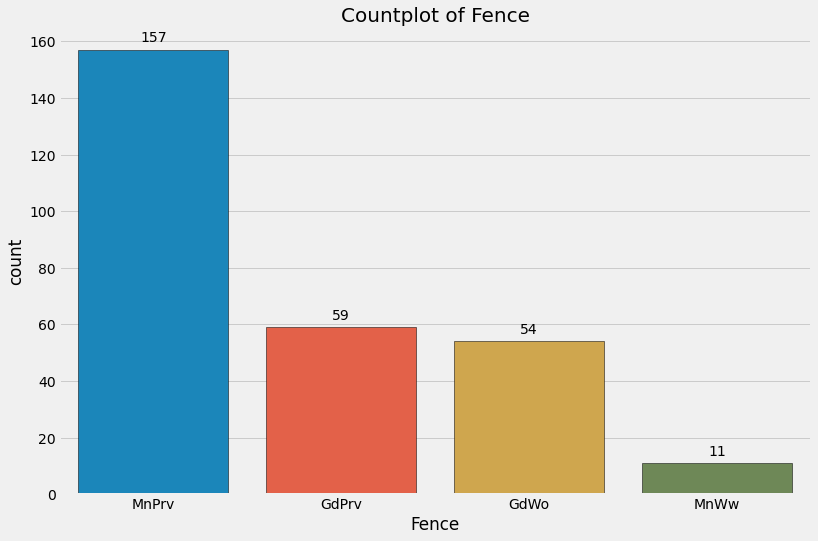

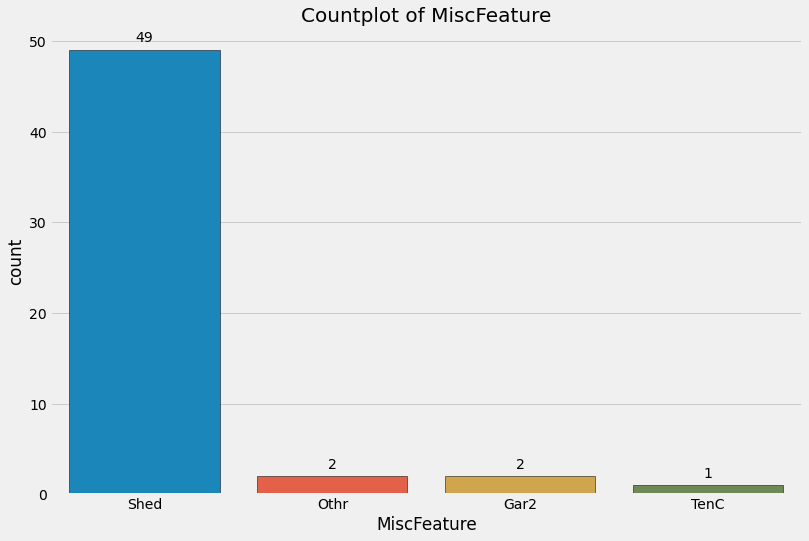

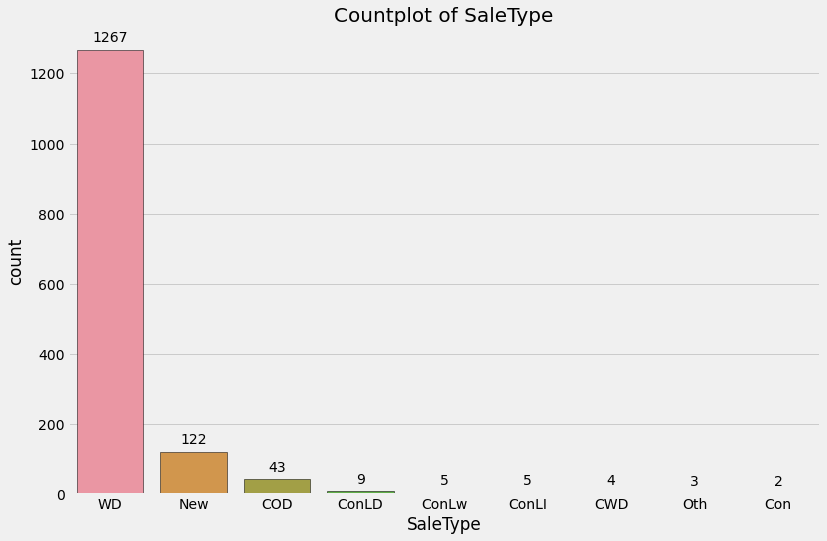

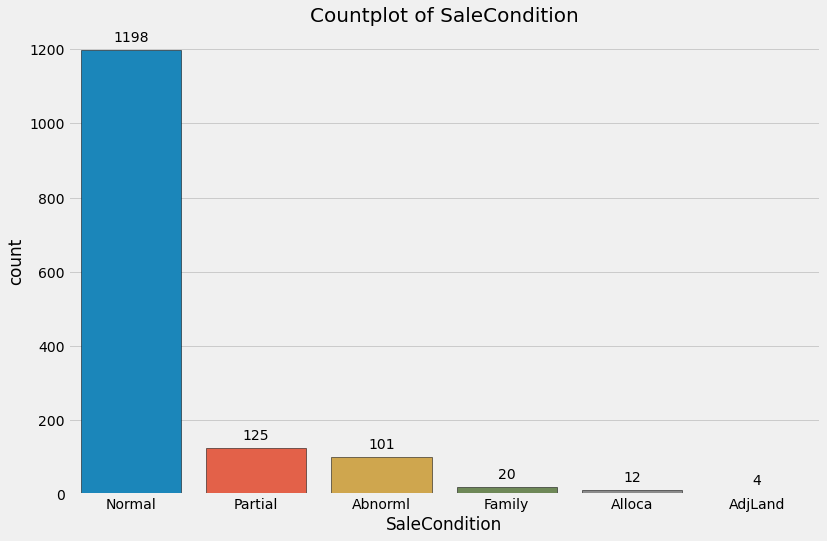

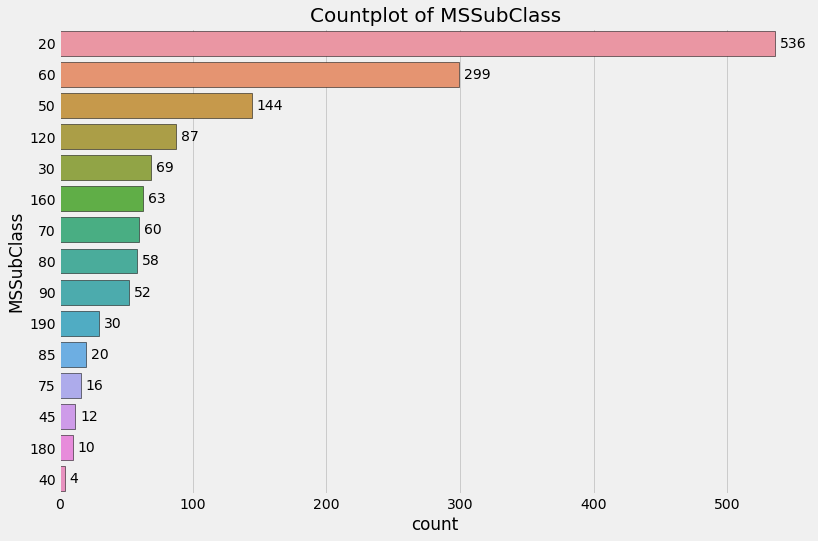

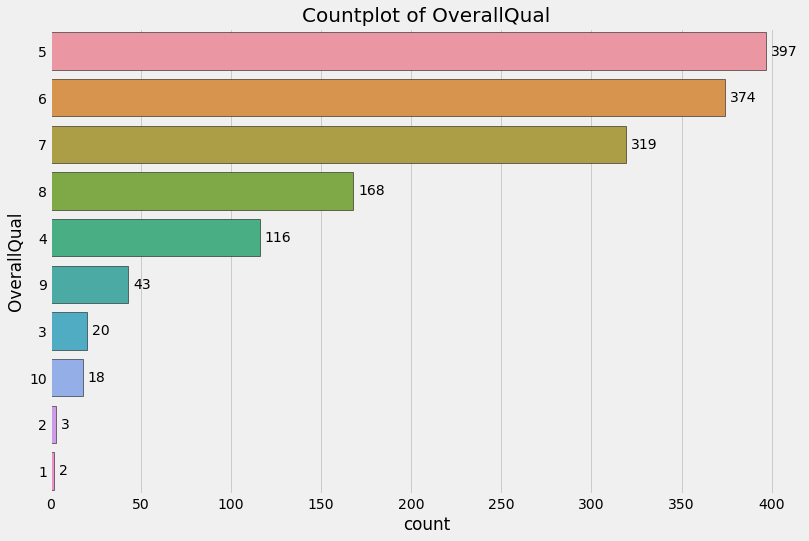

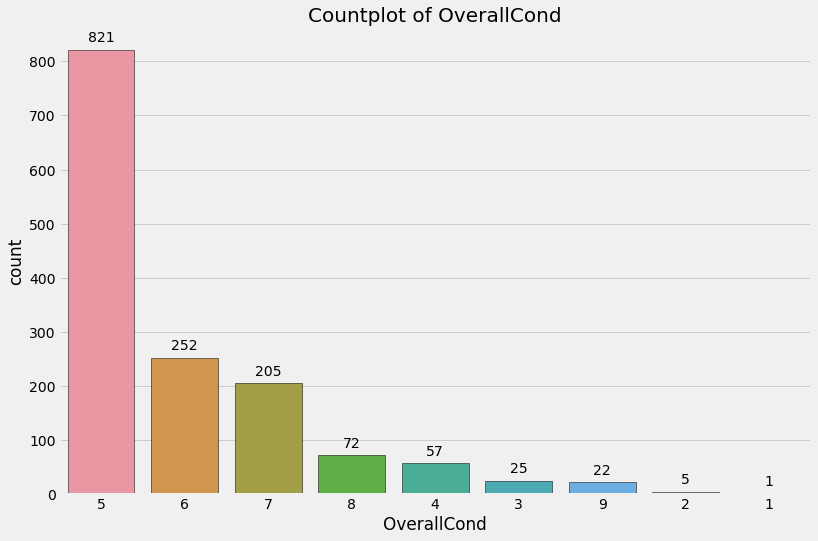

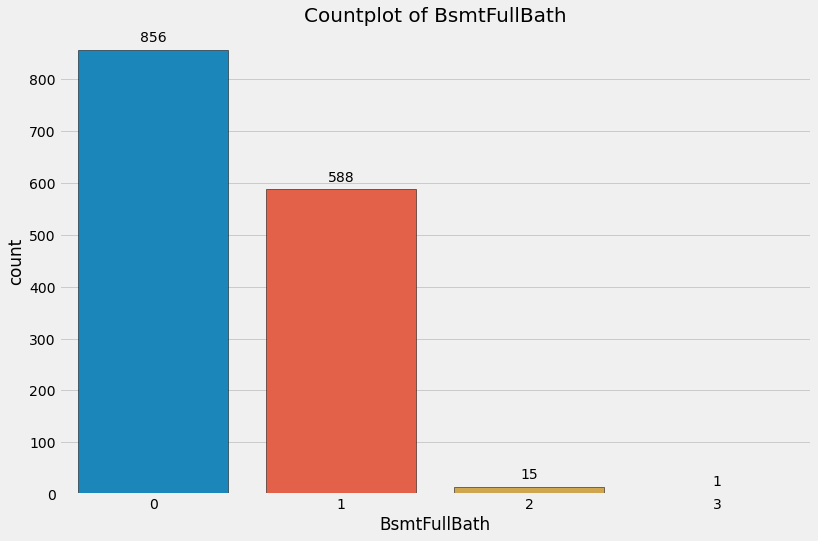

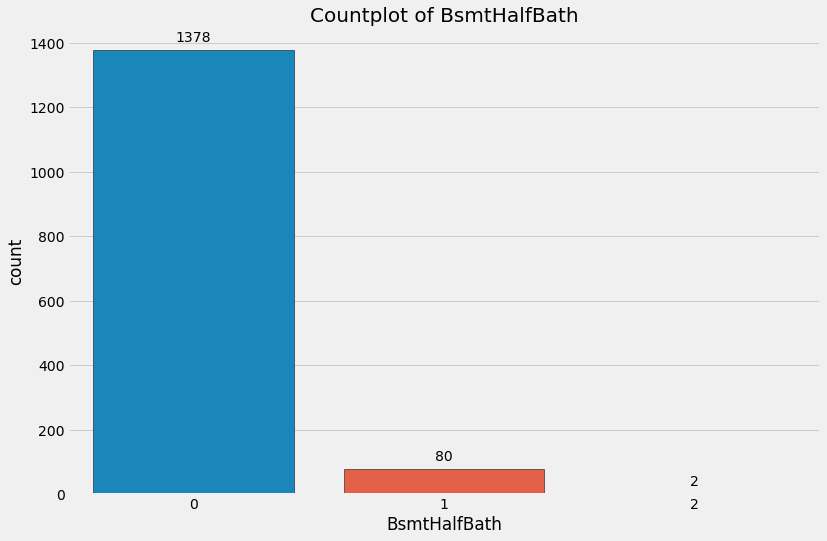

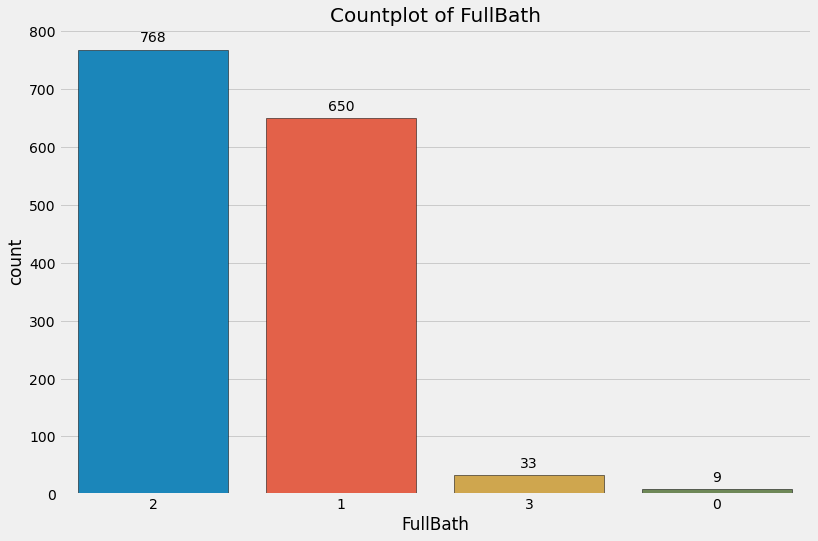

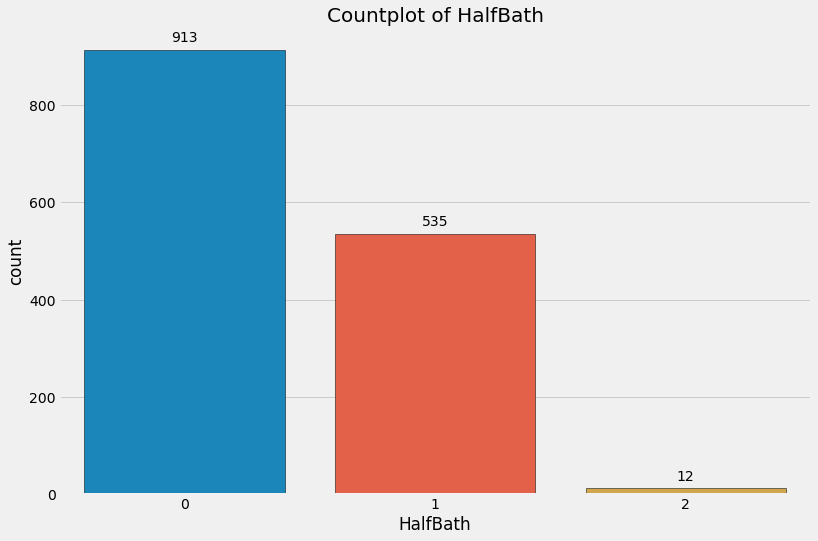

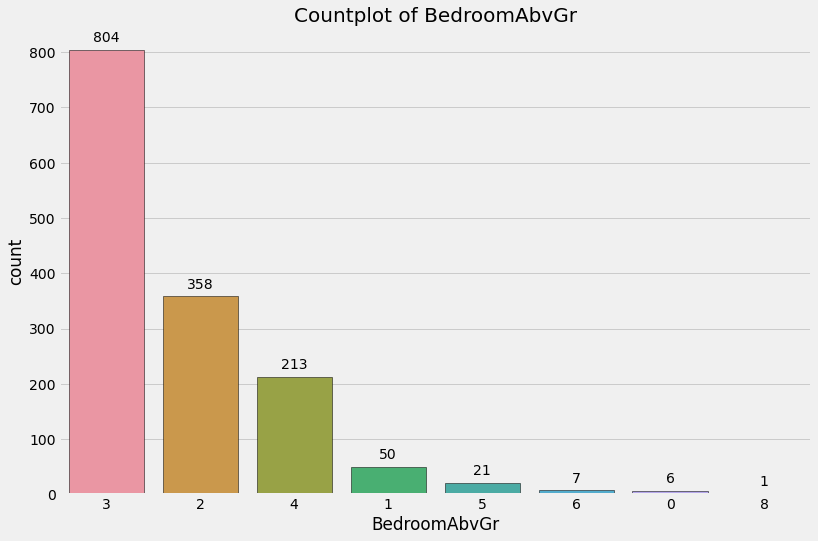

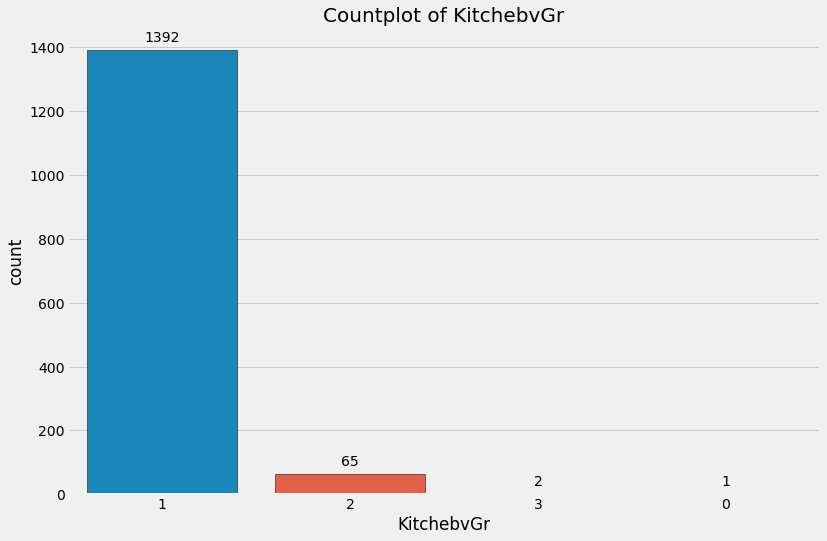

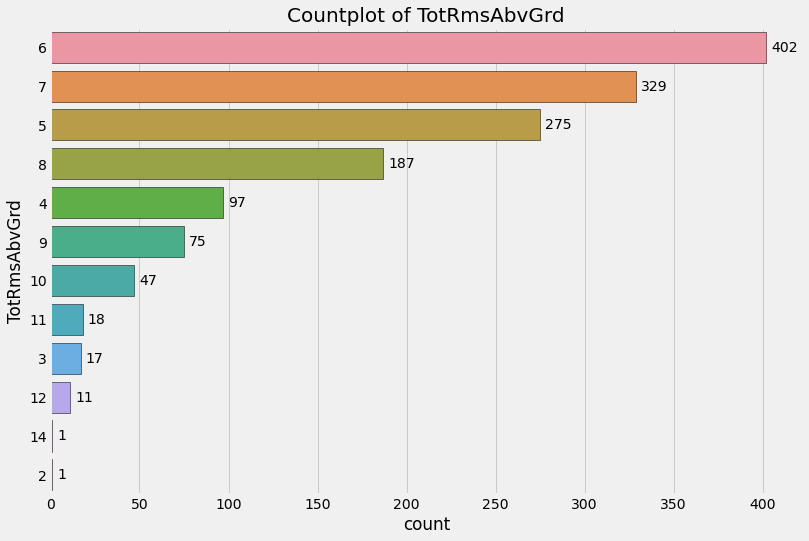

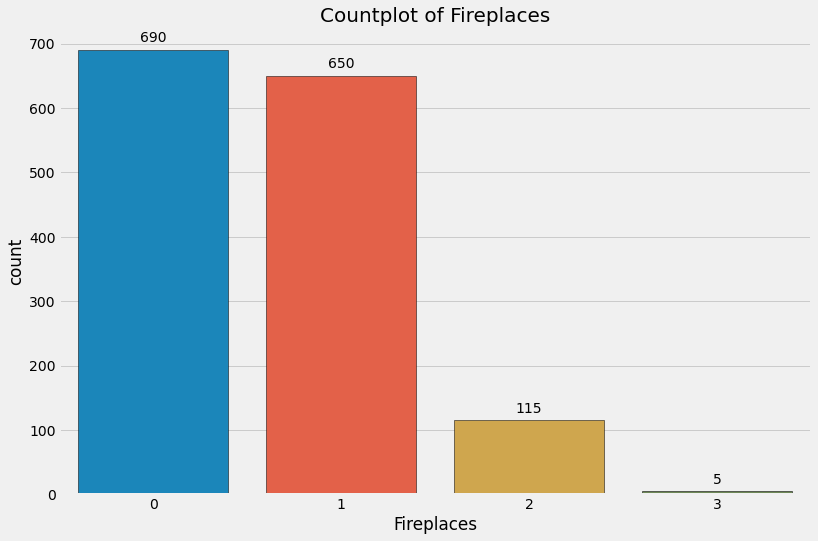

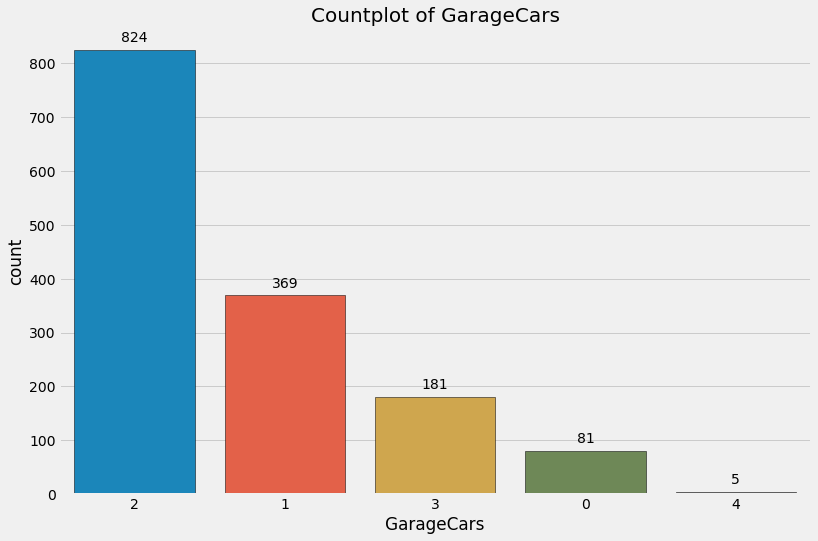

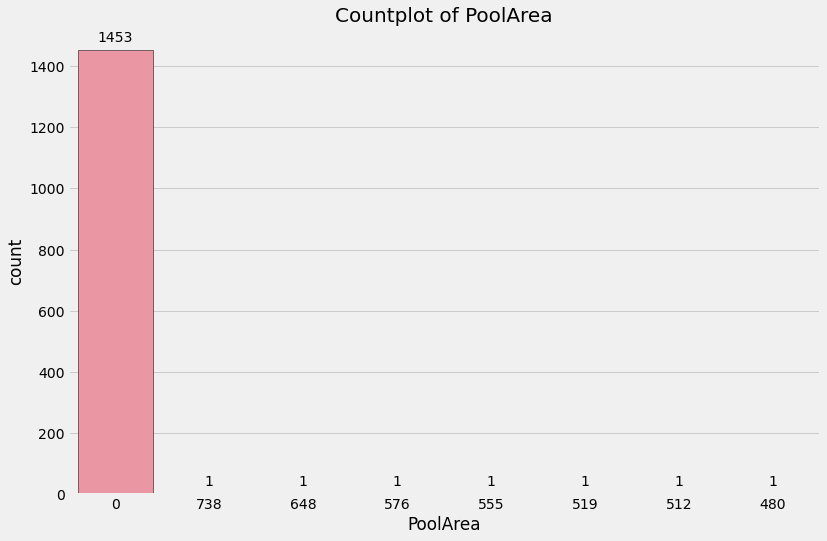

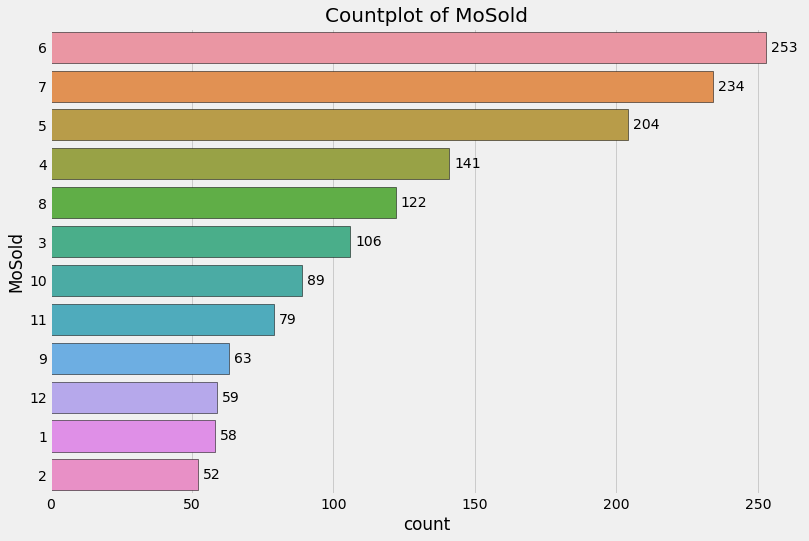

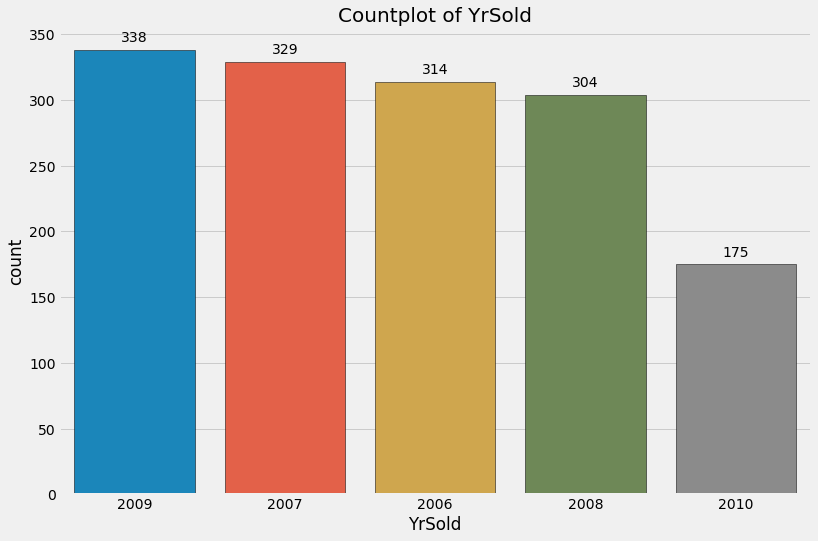

In [38]:
from fasteda import fast_eda
fast_eda(data)